In [228]:
#Basic Modules
import pandas as pd
import numpy as np
#plots
import seaborn as sns
import plotly.graph_objects as go
#Data Handling
from sklearn.preprocessing import (Normalizer,StandardScaler,MinMaxScaler)
from sklearn.preprocessing import OneHotEncoder

# Genetic Modules
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestClassifier
from matplotlib import rcParams
from cycler import cycler
#Log Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, precision_score,
                             f1_score,balanced_accuracy_score)
#Naive Bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay,r2_score
# Neural Network
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import plot_model
import matplotlib.pyplot as plt

import pickle 

In [2]:
route = 'C:/Users/Emilio/Desktop/TOG Exp/Datasets/'
# data = pd.read_parquet(route+'ohlcV.parquet')
# data = pd.read_parquet(route+'ohlc-2017.parquet')
data = pd.read_parquet(route + 'ohlc-2021.parquet')
#data = pd.read_parquet(route + 'ohlc1.parquet')
data = data.drop(['drop', 'close_time'], axis=1)
uniswap= pd.read_csv(route+'uniswap_wbtcusdt.csv')
data.head()

,open,high,low,close,volume,quote_asset_volume,trades,buy_asset_volume,taker_buy_asset_volume
timestamp,,,,,,,,,
2021-01-01 00:00:00,28923.63,28961.66,28913.12,28961.66,27.457032,7.943820e+05,1292,16.777195,485390.826825
2021-01-01 00:01:00,28961.67,29017.50,28961.01,29009.91,58.477501,1.695803e+06,1651,33.733818,978176.468202
2021-01-01 00:02:00,29009.54,29016.71,28973.58,28989.30,42.470329,1.231359e+06,986,13.247444,384076.854453
2021-01-01 00:03:00,28989.68,28999.85,28972.33,28982.69,30.360677,8.800168e+05,959,9.456028,274083.075142
2021-01-01 00:04:00,28982.67,28995.93,28971.80,28975.65,24.124339,6.992262e+05,726,6.814644,197519.374888


In [3]:
uniswap['timestamp']=uniswap['Unnamed: 0']
uniswap['timestamp']= pd.to_datetime(uniswap['timestamp'], origin='unix')
uniswap=uniswap.drop(['Unnamed: 0'],axis=1)

In [4]:
uni = uniswap.set_index('timestamp')
uni

,price,trades_volume,base_volume,quote_volume,mean_gas_value
timestamp,,,,,
2022-06-01 00:00:00,31862.760717,3.0,0.863209,27569.406938,0.010135
2022-06-01 01:00:00,0.000000,0.0,0.000000,0.000000,0.000000
2022-06-01 02:00:00,0.000000,0.0,0.000000,0.000000,0.000000
2022-06-01 03:00:00,31690.427510,2.0,1.326896,42096.735179,0.008490
2022-06-01 04:00:00,31596.824519,7.0,3.475890,109566.613201,0.011120
...,...,...,...,...,...
2022-11-14 20:00:00,16188.872768,2.0,0.013455,219.052352,0.004502
2022-11-14 21:00:00,16363.615706,3.0,0.466814,7628.312433,0.002758
2022-11-14 22:00:00,16397.541418,1.0,0.003790,62.146518,0.004974


In [5]:
print(data.shape)
print(data.isnull().sum())
print(uni.shape)
print(uni.isnull().sum())

(962367, 9)
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_asset_volume        0
trades                    0
buy_asset_volume          0
taker_buy_asset_volume    0
dtype: int64
(4175, 5)
price             0
trades_volume     0
base_volume       0
quote_volume      0
mean_gas_value    0
dtype: int64


In [6]:
# %% Quick description of the data
desc = data.describe()
info = data.info()
print(desc, info)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 962367 entries, 2021-01-01 00:00:00 to 2022-10-31 23:59:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   open                    962367 non-null  float64
 1   high                    962367 non-null  float64
 2   low                     962367 non-null  float64
 3   close                   962367 non-null  float64
 4   volume                  962367 non-null  float64
 5   quote_asset_volume      962367 non-null  float64
 6   trades                  962367 non-null  int64  
 7   buy_asset_volume        962367 non-null  float64
 8   taker_buy_asset_volume  962367 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 73.4 MB
                open           high            low          close  \
count  962367.000000  962367.000000  962367.000000  962367.000000   
mean    39651.462393   39678.499365   39624.563856   39651.451460   
std 

In [7]:
uni.describe

<bound method NDFrame.describe of                             price  trades_volume  base_volume   quote_volume  \
timestamp                                                                      
2022-06-01 00:00:00  31862.760717            3.0     0.863209   27569.406938   
2022-06-01 01:00:00      0.000000            0.0     0.000000       0.000000   
2022-06-01 02:00:00      0.000000            0.0     0.000000       0.000000   
2022-06-01 03:00:00  31690.427510            2.0     1.326896   42096.735179   
2022-06-01 04:00:00  31596.824519            7.0     3.475890  109566.613201   
...                           ...            ...          ...            ...   
2022-11-14 20:00:00  16188.872768            2.0     0.013455     219.052352   
2022-11-14 21:00:00  16363.615706            3.0     0.466814    7628.312433   
2022-11-14 22:00:00  16397.541418            1.0     0.003790      62.146518   
2022-11-14 23:00:00  16651.730227            3.0     1.309740   21683.416419   
2022-1

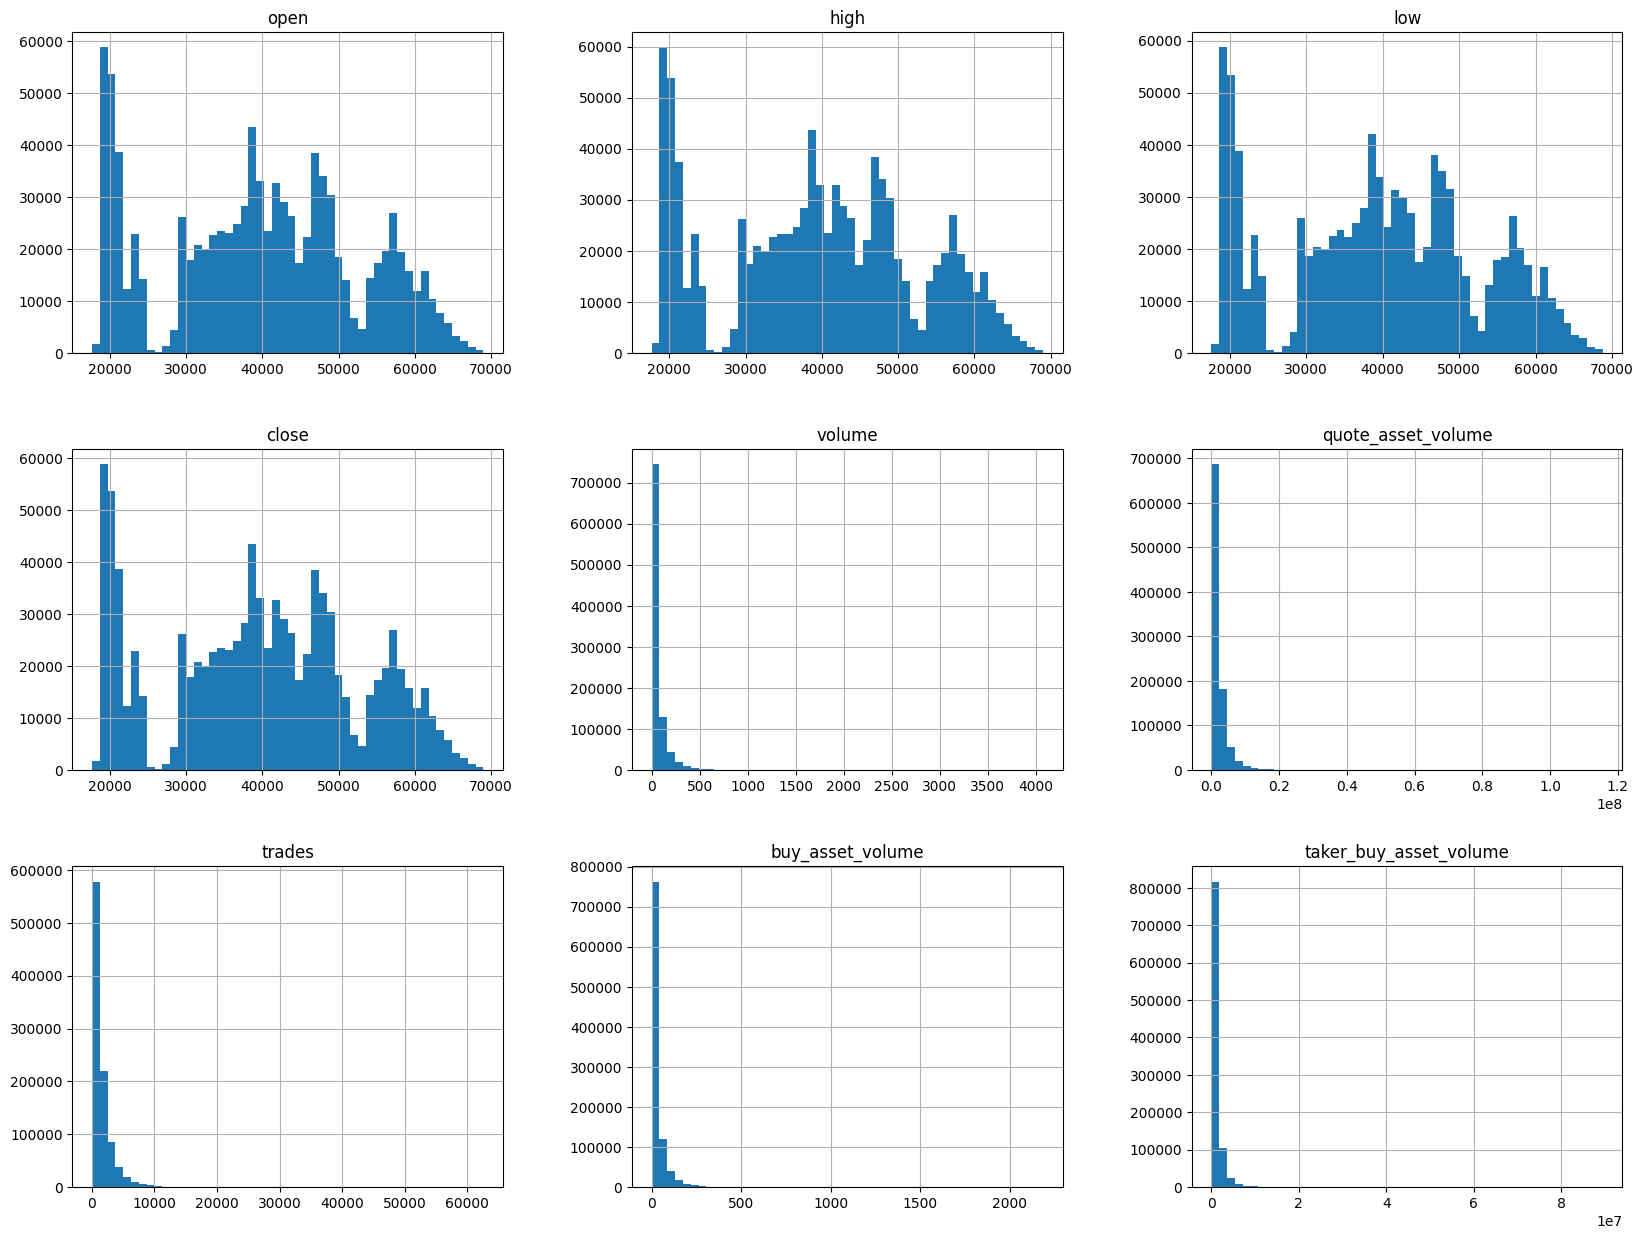

<AxesSubplot:xlabel='timestamp'>

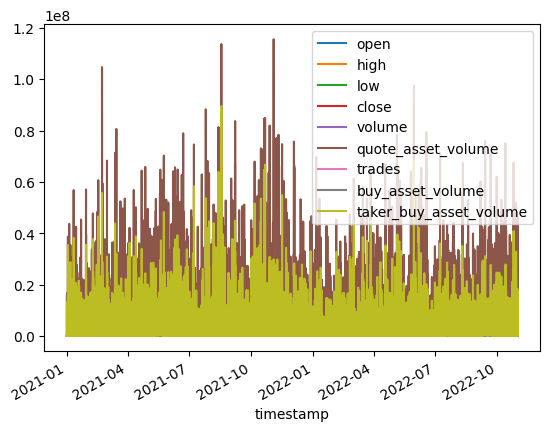

In [8]:
# %matplotlib inline
data.hist(bins=50, figsize=(20, 15))
plt.show()

data.plot()

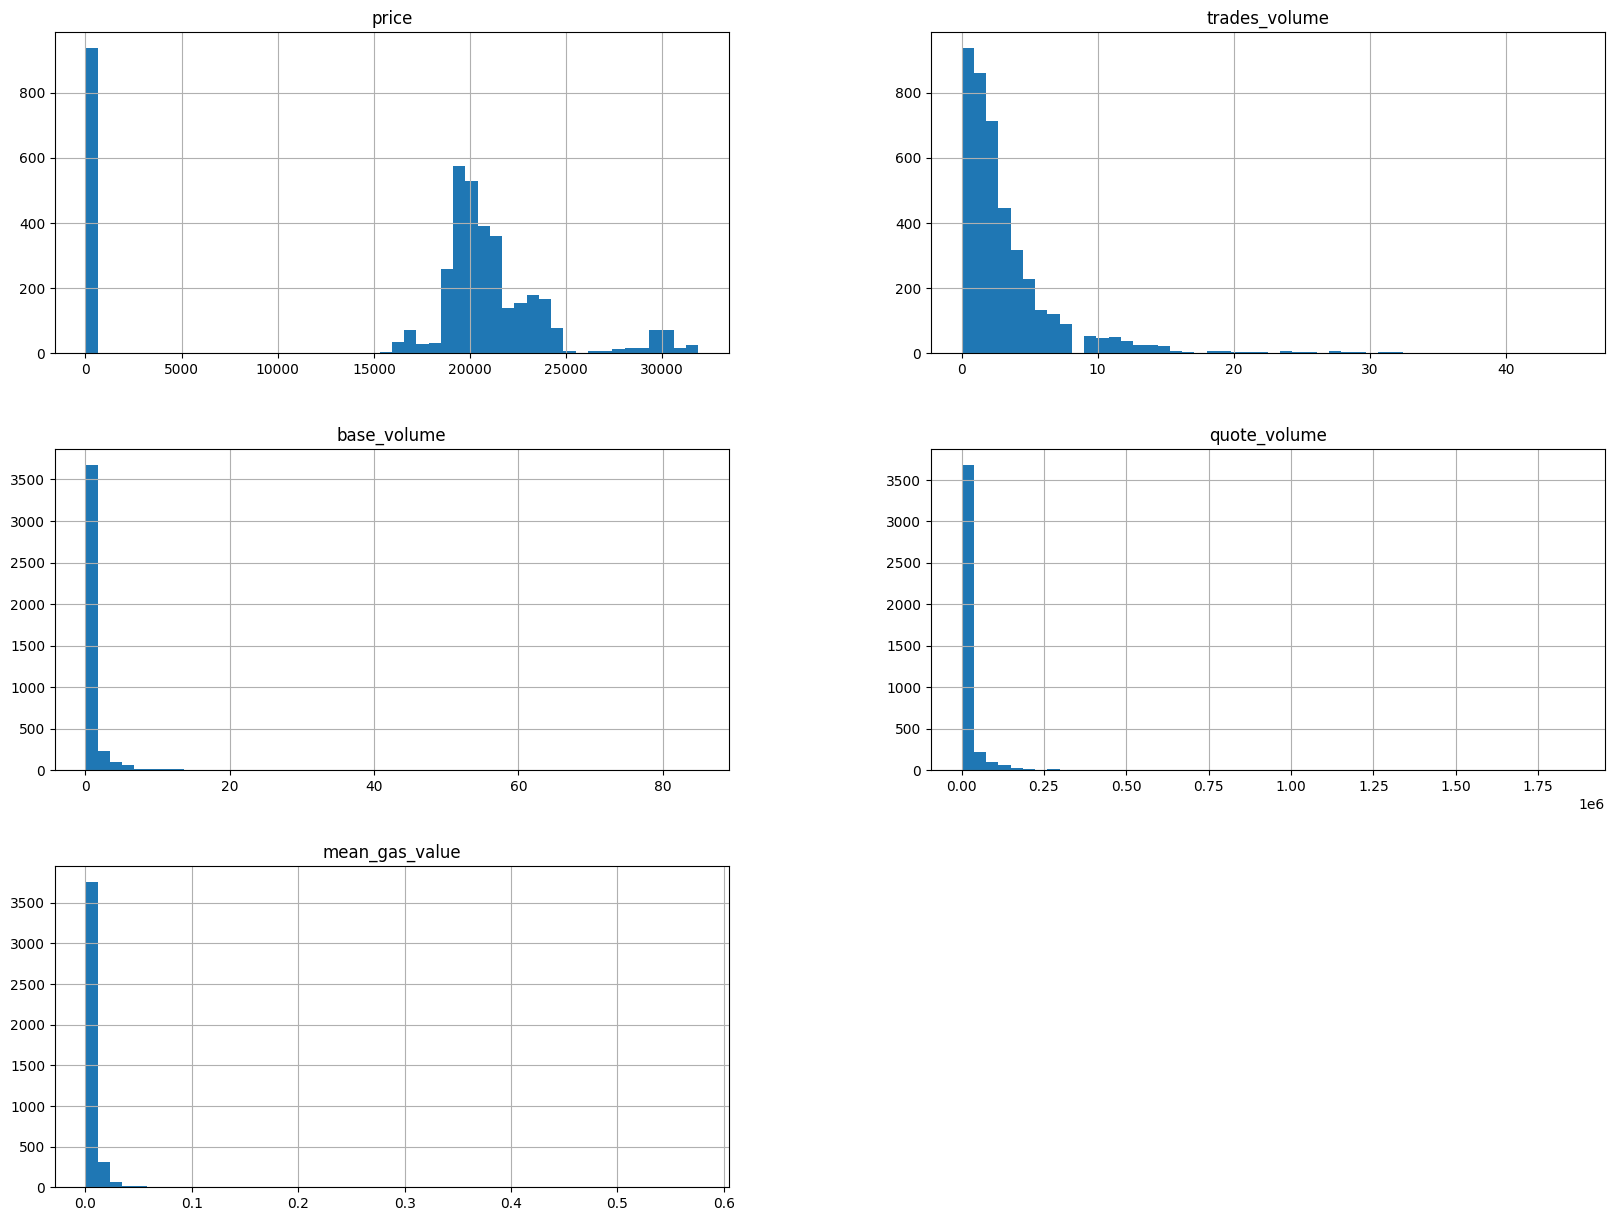

<AxesSubplot:xlabel='timestamp'>

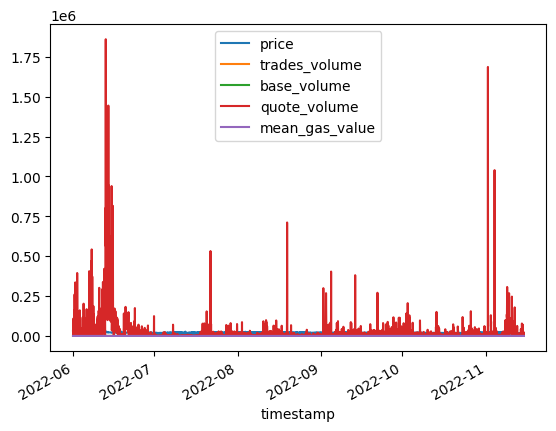

In [9]:
uni.hist(bins=50, figsize=(20, 15))
plt.show()

uni.plot()

In [11]:
# %% Resampling
rs = '1H'
data1 = data.copy()
data1['open'] = data1['open'].resample(rs).first()
data1['high'] = data1['high'].resample(rs).max()
data1['low'] = data1['low'].resample(rs).min()
data1['close'] = data1['close'].resample(rs).last()
data1['volume'] = data1['volume'].resample(rs).sum()
data1['quote_asset_volume'] = data1['quote_asset_volume'].resample(rs).sum()
data1['trades'] = data1['trades'].resample(rs).sum()
data1['buy_asset_volume'] = data1['buy_asset_volume'].resample(rs).sum()
data1['taker_buy_asset_volume'] = data1['taker_buy_asset_volume'].resample(rs).sum()
data1 = data1.resample(rs).sum()
print(data1.shape)
data1.head()


(16056, 9)


,open,high,low,close,volume,quote_asset_volume,trades,buy_asset_volume,taker_buy_asset_volume
timestamp,,,,,,,,,
2021-01-01 00:00:00,28923.63,29031.34,28690.17,28995.13,2311.811445,6.676883e+07,58389.0,1215.359238,3.510354e+07
2021-01-01 01:00:00,28995.13,29470.00,28960.35,29409.99,5403.068471,1.583578e+08,103896.0,3160.041701,9.261399e+07
2021-01-01 02:00:00,29410.00,29465.26,29120.03,29194.65,2384.231560,6.984265e+07,57646.0,1203.433506,3.525275e+07
2021-01-01 03:00:00,29195.25,29367.00,29150.02,29278.40,1461.345077,4.276078e+07,42510.0,775.915666,2.270555e+07
2021-01-01 04:00:00,29278.41,29395.00,29029.40,29220.31,2038.046803,5.961464e+07,55414.0,1003.342834,2.934638e+07


In [12]:
data_uni = pd.merge(data1,uni,on='timestamp')
data_uni

,open,high,low,close,volume,quote_asset_volume,trades,buy_asset_volume,taker_buy_asset_volume,price,trades_volume,base_volume,quote_volume,mean_gas_value
timestamp,,,,,,,,,,,,,,
2022-06-01 00:00:00,31801.05,31982.97,31688.01,31936.54,2237.33599,7.124308e+07,42824.0,1126.48151,3.587198e+07,31862.760717,3.0,0.863209,27569.406938,0.010135
2022-06-01 01:00:00,31936.53,31947.26,31836.99,31926.12,1280.94083,4.084851e+07,28855.0,593.95656,1.894059e+07,0.000000,0.0,0.000000,0.000000,0.000000
2022-06-01 02:00:00,31926.13,31926.13,31731.01,31806.72,1647.05696,5.239043e+07,32973.0,713.50400,2.269563e+07,0.000000,0.0,0.000000,0.000000,0.000000
2022-06-01 03:00:00,31806.71,31806.72,31614.01,31627.30,1937.06614,6.139687e+07,36931.0,826.14448,2.618057e+07,31690.427510,2.0,1.326896,42096.735179,0.008490
2022-06-01 04:00:00,31627.29,31670.00,31371.45,31566.60,2528.78791,7.972319e+07,44628.0,1179.01419,3.717423e+07,31596.824519,7.0,3.475890,109566.613201,0.011120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 19:00:00,20433.90,20438.01,20360.37,20371.72,12193.69642,2.487188e+08,253179.0,5944.94510,1.212673e+08,20468.037120,1.0,0.000611,12.505766,0.002806
2022-10-31 20:00:00,20371.40,20441.99,20353.77,20401.49,7588.08696,1.547771e+08,173815.0,3808.44259,7.768457e+07,0.000000,0.0,0.000000,0.000000,0.000000
2022-10-31 21:00:00,20401.49,20430.80,20390.23,20406.58,4043.39784,8.252233e+07,117665.0,2038.12129,4.159776e+07,20344.977408,1.0,0.004413,89.783606,0.003315


In [115]:
# %% Feature Engineering

ohlcv = data_uni.copy()
# OHLC Chart
fig = go.Figure(data=go.Ohlc(x=ohlcv.index,
                             open=ohlcv['open'],
                             high=ohlcv['high'],
                             low=ohlcv['low'],
                             close=ohlcv['close']))

fig.show()


In [120]:
# Volatility
volatility = []
for i in range(len(ohlcv)):
    vol = ohlcv['high'][i] - ohlcv['low'][i]
    volatility.append(vol)
ohlcv['volatility'] = volatility

# micro trends
high_open = []
for i in range(len(ohlcv)):
    ho = ohlcv['high'][i] - ohlcv['open'][i]
    high_open.append(ho)
ohlcv['high_open'] = high_open

open_low = []
for i in range(len(ohlcv)):
    ol = ohlcv['open'][i] - ohlcv['low'][i]
    open_low.append(ol)
ohlcv['open_low'] = open_low

close_open = []
for i in range(len(ohlcv)):
    co = ohlcv['close'][i] - ohlcv['open'][i]
    close_open.append(co)
ohlcv['close_open'] = close_open
ohlcv.head()

ohlcv2 = ohlcv.copy()
ohlcv2

,open,high,low,close,volume,quote_asset_volume,trades,buy_asset_volume,taker_buy_asset_volume,price,trades_volume,base_volume,quote_volume,mean_gas_value,volatility,high_open,open_low,close_open
timestamp,,,,,,,,,,,,,,,,,,
2022-06-01 00:00:00,31801.05,31982.97,31688.01,31936.54,2237.33599,7.124308e+07,42824.0,1126.48151,3.587198e+07,31862.760717,3.0,0.863209,27569.406938,0.010135,294.96,181.92,113.04,135.49
2022-06-01 01:00:00,31936.53,31947.26,31836.99,31926.12,1280.94083,4.084851e+07,28855.0,593.95656,1.894059e+07,0.000000,0.0,0.000000,0.000000,0.000000,110.27,10.73,99.54,-10.41
2022-06-01 02:00:00,31926.13,31926.13,31731.01,31806.72,1647.05696,5.239043e+07,32973.0,713.50400,2.269563e+07,0.000000,0.0,0.000000,0.000000,0.000000,195.12,0.00,195.12,-119.41
2022-06-01 03:00:00,31806.71,31806.72,31614.01,31627.30,1937.06614,6.139687e+07,36931.0,826.14448,2.618057e+07,31690.427510,2.0,1.326896,42096.735179,0.008490,192.71,0.01,192.70,-179.41
2022-06-01 04:00:00,31627.29,31670.00,31371.45,31566.60,2528.78791,7.972319e+07,44628.0,1179.01419,3.717423e+07,31596.824519,7.0,3.475890,109566.613201,0.011120,298.55,42.71,255.84,-60.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 19:00:00,20433.90,20438.01,20360.37,20371.72,12193.69642,2.487188e+08,253179.0,5944.94510,1.212673e+08,20468.037120,1.0,0.000611,12.505766,0.002806,77.64,4.11,73.53,-62.18
2022-10-31 20:00:00,20371.40,20441.99,20353.77,20401.49,7588.08696,1.547771e+08,173815.0,3808.44259,7.768457e+07,0.000000,0.0,0.000000,0.000000,0.000000,88.22,70.59,17.63,30.09
2022-10-31 21:00:00,20401.49,20430.80,20390.23,20406.58,4043.39784,8.252233e+07,117665.0,2038.12129,4.159776e+07,20344.977408,1.0,0.004413,89.783606,0.003315,40.57,29.31,11.26,5.09


In [117]:
symbolic_params = {'functions': ["sub", "add", 'inv', 'mul', 'div', 'abs', 'log','sqrt'],
        'population': 12000, 'tournament':3000, 'hof': 30, 'generations': 5, 'n_features':20,
        'init_depth': (4,8), 'init_method': 'half and half', 'parsimony': 0.1, 'constants': None,
        'metric': 'pearson', 'metric_goal': 0.65, 
        'prob_cross': 0.4, 'prob_mutation_subtree': 0.5,
        'prob_mutation_hoist': 0.05, 'prob_mutation_point': 0.05,
        'verbose': True, 'random_cv': None, 'parallelization': True, 'warm_start': True }

In [121]:
# %% Rolling stats
ohlcv2 = ohlcv2.drop(['quote_asset_volume', 'buy_asset_volume', 'taker_buy_asset_volume', 'trades',
                     'price','trades_volume','base_volume','quote_volume','mean_gas_value','volatility','high_open','open_low',
                      'close_open'], axis=1)

def autoregressive_features(p_data, p_memory):
    """
    Creacion de variables de naturaleza autoregresiva (resagos, promedios, diferencias)
    Parameters
    ----------
    p_data: pd.DataFrame
        with OHLCV columns: Open, High, Low, Close, Volume
    p_memory: int
        A value that represents the implicit assumption of a "memory" effect in the prices
    Returns
    -------
    r_features: pd.DataFrame

    """

    # work with a separate copy of original data
    data = ohlcv2.copy()

    # nth-period final price "movement"
    data['co'] = (data['close'] - data['open'])
    # nth-period uptrend movement
    data['ho'] = (data['high'] - data['open'])
    # nth-period downtrend movement
    data['ol'] = (data['open'] - data['low'])
    # nth-period volatility measure
    data['hl'] = (data['high'] - data['low'])

    # N features with window-based calculations
    for n in range(0, p_memory):
        data['ma_ol'] = data['ol'].rolling(n + 2).mean()
        data['ma_ho'] = data['ho'].rolling(n + 2).mean()
        data['ma_hl'] = data['hl'].rolling(n + 2).mean()

        data['lag_ol_' + str(n + 1)] = data['ol'].shift(n + 1)
        data['lag_ho_' + str(n + 1)] = data['ho'].shift(n + 1)
        data['lag_hl_' + str(n + 1)] = data['hl'].shift(n + 1)

        data['sd_ol_' + str(n + 1)] = data['ol'].rolling(n + 1).std()
        data['sd_ho_' + str(n + 1)] = data['ho'].rolling(n + 1).std()
        data['sd_hl_' + str(n + 1)] = data['hl'].rolling(n + 1).std()

        data['lag_vol_' + str(n + 1)] = data['volume'].shift(n + 1)
        data['sum_vol_' + str(n + 1)] = data['volume'].rolling(n + 1).sum()
        data['mean_vol_' + str(n + 1)] = data['volume'].rolling(n + 1).mean()

    # timestamp as index
    data.index = pd.to_datetime(data.index)
    # select columns, drop for NAs, change column types, reset index
    r_features = data.drop(['open', 'high', 'low', 'close', 'hl', 'ol', 'ho', 'volume'], axis=1)
    r_features = r_features.dropna(axis='columns', how='all')
    # r_features = r_features.dropna(axis='rows')
    r_features.iloc[:, 1:] = r_features.iloc[:, 1:].astype(float)
    r_features.reset_index(inplace=True, drop=True)

    return r_features

In [122]:
def symbolic_features(p_x, p_y, p_params):
    """
    Feature engineering process with symbolic variables by using genetic programming. 
    Parameters
    ----------
    p_x: pd.DataFrame / np.array / list
        with regressors or predictor variables
        p_x = data_features.iloc[:, 1:]
    p_y: pd.DataFrame / np.array / list
        with variable to predict
        p_y = data_features.iloc[:, 0]
    p_params: dict
        with parameters for the genetic programming function
        p_params = {'functions': ["sub", "add", 'inv', 'mul', 'div', 'abs', 'log'],
        'population': 5000, 'tournament':20, 'hof': 20, 'generations': 5, 'n_features':20,
        'init_depth': (4,8), 'init_method': 'half and half', 'parsimony': 0.1, 'constants': None,
        'metric': 'pearson', 'metric_goal': 0.65, 
        'prob_cross': 0.4, 'prob_mutation_subtree': 0.3,
        'prob_mutation_hoist': 0.1. 'prob_mutation_point': 0.2,
        'verbose': True, 'random_cv': None, 'parallelization': True, 'warm_start': True }
    Returns
    -------
    results: dict
        With response information
        {'fit': model fitted, 'params': model parameters, 'model': model,
         'data': generated data with variables, 'best_programs': models best programs}
    References
    ----------
    https://gplearn.readthedocs.io/en/stable/reference.html#gplearn.genetic.SymbolicTransformer
    
    
    **** NOTE ****
    simplified internal calculation for correlation (asuming w=1)
    
    y_pred_demean = y_pred - np.average(y_pred)
    y_demean = y - np.average(y)
                              np.sum(y_pred_demean * y_demean)
    pearson =  ---------------------------------------------------------------
                np.sqrt((np.sum(y_pred_demean ** 2) * np.sum(y_demean ** 2)))  
    """
     
    # Function to produce Symbolic Features
    model = SymbolicTransformer(function_set=p_params['functions'], population_size=p_params['population'],
                                tournament_size=p_params['tournament'], hall_of_fame=p_params['hof'],
                                generations=p_params['generations'], n_components=p_params['n_features'],

                                init_depth=p_params['init_depth'], init_method=p_params['init_method'],
                                parsimony_coefficient=p_params['parsimony'],
                                const_range=p_params['constants'],
                                
                                metric=p_params['metric'], stopping_criteria=p_params['metric_goal'],

                                p_crossover=p_params['prob_cross'],
                                p_subtree_mutation=p_params['prob_mutation_subtree'],
                                p_hoist_mutation=p_params['prob_mutation_hoist'],
                                p_point_mutation=p_params['prob_mutation_point'],
                                max_samples=1,

                                verbose=p_params['verbose'], warm_start=p_params['warm_start'],
                                random_state=123, n_jobs=-1 if p_params['parallelization'] else 1,
                                feature_names=p_x.columns)

    # SymbolicTransformer fit
    model_fit = model.fit_transform(p_x, p_y)

    # output data of the model
    data = pd.DataFrame(model_fit)

    # parameters of the model
    model_params = model.get_params()

    # best programs dataframe
    best_programs = {}
    for p in model._best_programs:
        factor_name = 'sym' + str(model._best_programs.index(p))
        best_programs[factor_name] = {'raw_fitness': p.raw_fitness_, 'reg_fitness': p.fitness_, 
                                      'expression': str(p), 'depth': p.depth_, 'length': p.length_}

    # format and sorting
    best_programs = pd.DataFrame(best_programs).T
    best_programs = best_programs.sort_values(by='raw_fitness', ascending=False)

    # results
    results = {'fit': model_fit, 'params': model_params, 'model': model, 'data': data,
               'best_programs': best_programs, 'details': model.run_details_}

    return results


In [123]:
def genetic_programed_features(p_data, p_target, p_params):
    """
    El uso de programacion genetica para generar variables independientes simbolicas
    Parameters
    ----------
    p_data: pd.DataFrame
        con datos completos para ajustar modelos
        
        p_data = m_folds['periodo_1']
    p_split: int
        split in val
        p_split = '0'
    p_params:
        parameters for symbolic_features process 
    Returns
    -------
    model_data: dict
        {'train_x': pd.DataFrame, 'train_y': pd.DataFrame, 'val_x': pd.DataFrame, 'val_y': pd.DataFrame}
    References
    ----------
    https://stackoverflow.com/questions/3819977/
    what-are-the-differences-between-genetic-algorithms-and-genetic-programming
    """
   
    # separacion de variable dependiente
    datos_y = y.copy().astype(int)

    # separacion de variables independientes
    datos_had = X.copy()
    # Lista de operaciones simbolicas
    sym_data = symbolic_features(p_x=datos_had, p_y=datos_y, p_params=symbolic_params)

    # Symbolic variables output
    datos_sym = sym_data['data'].copy()
    datos_sym.columns = ['sym_' + str(i) for i in range(0, len(sym_data['data'].iloc[0, :]))]
    datos_sym.index = datos_y.index
   
    return {'sym_data': sym_data, 'sym_features': datos_sym}


In [124]:
p_memory = 24
data_ar = autoregressive_features(p_data=ohlcv2, p_memory=p_memory)
data_ar.index = ohlcv2.index

C:\Users\Emilio\AppData\Local\Temp\ipykernel_14440\3782194109.py:41: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Emilio\AppData\Local\Temp\ipykernel_14440\3782194109.py:43: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Emilio\AppData\Local\Temp\ipykernel_14440\3782194109.py:44: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [125]:
ohlcv = pd.merge(ohlcv,data_ar, on='timestamp')
ohlcv = ohlcv.dropna(axis='rows')
ohlcv

,open,high,low,close,volume,quote_asset_volume,trades,buy_asset_volume,taker_buy_asset_volume,price,...,mean_vol_23,lag_ol_24,lag_ho_24,lag_hl_24,sd_ol_24,sd_ho_24,sd_hl_24,lag_vol_24,sum_vol_24,mean_vol_24
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-06-02 00:00:00,29805.84,29817.89,29594.55,29680.00,2826.62933,8.397351e+07,49280.0,1349.38135,4.008587e+07,29685.711142,...,4465.390710,113.04,181.92,294.96,235.135958,92.804361,213.782208,2237.33599,103984.92716,4332.705298
2022-06-02 00:00:00,29805.84,29817.89,29594.55,29680.00,2826.62933,8.397351e+07,49280.0,1349.38135,4.008587e+07,29685.711142,...,4516.676465,99.54,10.73,110.27,233.793637,92.751978,210.317242,1280.94083,105530.61566,4397.108986
2022-06-02 00:00:00,29805.84,29817.89,29594.55,29680.00,2826.62933,8.397351e+07,49280.0,1349.38135,4.008587e+07,29685.711142,...,4465.390710,113.04,181.92,294.96,235.135958,92.804361,213.782208,2237.33599,103984.92716,4332.705298
2022-06-02 00:00:00,29805.84,29817.89,29594.55,29680.00,2826.62933,8.397351e+07,49280.0,1349.38135,4.008587e+07,29685.711142,...,4516.676465,99.54,10.73,110.27,233.793637,92.751978,210.317242,1280.94083,105530.61566,4397.108986
2022-06-02 01:00:00,29680.01,29888.02,29640.18,29811.89,1742.44118,5.191352e+07,36801.0,927.12865,2.761999e+07,29831.049628,...,4508.214510,195.12,0.00,195.12,236.715525,93.099689,209.243860,1647.05696,105625.99988,4401.083328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 19:00:00,20433.90,20438.01,20360.37,20371.72,12193.69642,2.487188e+08,253179.0,5944.94510,1.212673e+08,20468.037120,...,13180.923333,1.17,91.23,92.40,79.654384,55.876933,86.397914,5987.93121,306715.08841,12779.795350
2022-10-31 20:00:00,20371.40,20441.99,20353.77,20401.49,7588.08696,1.547771e+08,173815.0,3808.44259,7.768457e+07,0.000000,...,12956.661160,16.15,26.05,42.20,79.607492,55.391360,84.714586,3553.85175,310749.32362,12947.888484
2022-10-31 21:00:00,20401.49,20430.80,20390.23,20406.58,4043.39784,8.252233e+07,117665.0,2038.12129,4.159776e+07,20344.977408,...,12840.193696,173.83,6.96,180.79,77.722135,54.586802,86.462995,12746.11693,302046.60453,12585.275189


In [128]:
ohlcv['timestamp']=ohlcv.index
ohlcv3= ohlcv.drop_duplicates(subset='timestamp', keep='first')

ohlcv4 = ohlcv3.iloc[:,:-1]
ohlcv4

,open,high,low,close,volume,quote_asset_volume,trades,buy_asset_volume,taker_buy_asset_volume,price,...,mean_vol_23,lag_ol_24,lag_ho_24,lag_hl_24,sd_ol_24,sd_ho_24,sd_hl_24,lag_vol_24,sum_vol_24,mean_vol_24
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-06-02 00:00:00,29805.84,29817.89,29594.55,29680.00,2826.62933,8.397351e+07,49280.0,1349.38135,4.008587e+07,29685.711142,...,4465.390710,113.04,181.92,294.96,235.135958,92.804361,213.782208,2237.33599,103984.92716,4332.705298
2022-06-02 01:00:00,29680.01,29888.02,29640.18,29811.89,1742.44118,5.191352e+07,36801.0,927.12865,2.761999e+07,29831.049628,...,4508.214510,195.12,0.00,195.12,236.715525,93.099689,209.243860,1647.05696,105625.99988,4401.083328
2022-06-02 02:00:00,29811.90,29903.74,29778.12,29826.16,1292.33107,3.855034e+07,28861.0,680.50268,2.029915e+07,29873.385712,...,4454.455517,192.70,0.01,192.71,239.602200,90.456721,211.466046,1937.06614,104981.26481,4374.219367
2022-06-02 03:00:00,29826.16,29856.93,29703.05,29730.12,1690.59886,5.034379e+07,34094.0,749.74232,2.232716e+07,0.000000,...,4471.712320,255.84,42.71,298.55,240.015793,90.866723,214.090797,2528.78791,104143.07576,4339.294823
2022-06-02 04:00:00,29730.12,29824.11,29650.93,29817.24,1223.11546,3.639184e+07,31720.0,599.63297,1.784136e+07,29695.672636,...,4478.876430,120.84,60.33,181.17,240.791757,90.355767,214.309173,1293.69241,104072.49881,4336.354117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 19:00:00,20433.90,20438.01,20360.37,20371.72,12193.69642,2.487188e+08,253179.0,5944.94510,1.212673e+08,20468.037120,...,13180.923333,1.17,91.23,92.40,79.654384,55.876933,86.397914,5987.93121,306715.08841,12779.795350
2022-10-31 20:00:00,20371.40,20441.99,20353.77,20401.49,7588.08696,1.547771e+08,173815.0,3808.44259,7.768457e+07,0.000000,...,12956.661160,16.15,26.05,42.20,79.607492,55.391360,84.714586,3553.85175,310749.32362,12947.888484
2022-10-31 21:00:00,20401.49,20430.80,20390.23,20406.58,4043.39784,8.252233e+07,117665.0,2038.12129,4.159776e+07,20344.977408,...,12840.193696,173.83,6.96,180.79,77.722135,54.586802,86.462995,12746.11693,302046.60453,12585.275189


In [134]:
# Target 
# %% Target Engineering y_hat:CO_{t}
treshold = 50

ohlc = pd.DataFrame(ohlcv4)

y_hat = []

for i in range(len(ohlc)):
    y_hat1 = ohlc["close"][i] - ohlc["open"][i]
    y_hat.append(y_hat1)
for i in range(len(ohlc)):
    if y_hat[i] < -treshold:
        y_hat[i] = -2
    elif -treshold <= y_hat[i] < 0:
        y_hat[i] = -1
    elif y_hat[i] == 0:
        y_hat[i] = -1
    elif 0 < y_hat[i] <= treshold:
        y_hat[i] = 1
    else:
        y_hat[i] = 2
# cambiar y_hat por y_hat
ohlc['y_hat'] = y_hat
y_hat_test = y_hat
ohlc.head()

,open,high,low,close,volume,quote_asset_volume,trades,buy_asset_volume,taker_buy_asset_volume,price,...,lag_ol_24,lag_ho_24,lag_hl_24,sd_ol_24,sd_ho_24,sd_hl_24,lag_vol_24,sum_vol_24,mean_vol_24,y_hat
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-06-02 00:00:00,29805.84,29817.89,29594.55,29680.00,2826.62933,8.397351e+07,49280.0,1349.38135,4.008587e+07,29685.711142,...,113.04,181.92,294.96,235.135958,92.804361,213.782208,2237.33599,103984.92716,4332.705298,-2
2022-06-02 01:00:00,29680.01,29888.02,29640.18,29811.89,1742.44118,5.191352e+07,36801.0,927.12865,2.761999e+07,29831.049628,...,195.12,0.00,195.12,236.715525,93.099689,209.243860,1647.05696,105625.99988,4401.083328,2
2022-06-02 02:00:00,29811.90,29903.74,29778.12,29826.16,1292.33107,3.855034e+07,28861.0,680.50268,2.029915e+07,29873.385712,...,192.70,0.01,192.71,239.602200,90.456721,211.466046,1937.06614,104981.26481,4374.219367,1
2022-06-02 03:00:00,29826.16,29856.93,29703.05,29730.12,1690.59886,5.034379e+07,34094.0,749.74232,2.232716e+07,0.000000,...,255.84,42.71,298.55,240.015793,90.866723,214.090797,2528.78791,104143.07576,4339.294823,-2
2022-06-02 04:00:00,29730.12,29824.11,29650.93,29817.24,1223.11546,3.639184e+07,31720.0,599.63297,1.784136e+07,29695.672636,...,120.84,60.33,181.17,240.791757,90.355767,214.309173,1293.69241,104072.49881,4336.354117,2


In [135]:
ohlc['y_hat'] = y_hat
ohlc['y_hat'] = ohlc['y_hat'].shift(-1)
# ohlc.dropna(inplace = True, axis=0)
ohlc.head()
ohlc['y_hat'].value_counts()


-2.0    1024
 2.0     992
-1.0     821
 1.0     810
Name: y_hat, dtype: int64

In [136]:
mart = []
# cambiar threshold a variables, en vez de hardcode que defina las clases y puede ser asimetrica.
for i in range(len(ohlc)):
    y_hat1 = ohlc["close"][i] - ohlc["open"][i]
    mart.append(y_hat1)
for i in range(len(ohlc)):
    if mart[i] < -treshold:
        mart[i] = -2
    elif -treshold <= mart[i] < 0:
        mart[i] = -1
    elif mart[i] == 0:
        mart[i] = -1
    elif 0 < mart[i] <= treshold:
        mart[i] = 1
    else:
        mart[i] = 2


In [137]:
# Martingale

ohlc['martingale'] = mart
ohlc['martingale'] = ohlc['martingale'].shift(+1)
ohlc = ohlc.fillna(-1)
ohlc2 = pd.DataFrame(ohlc)
ohlc2.to_csv('C:/Users/Emilio/Desktop/Thesis/ohlc2.csv')
ohlc2['martingale'].value_counts()


-2.0    1025
 2.0     992
-1.0     822
 1.0     809
Name: martingale, dtype: int64

In [138]:
print(ohlc['y_hat'].describe())

count    3648.000000
mean       -0.020833
std         1.630395
min        -2.000000
25%        -2.000000
50%        -1.000000
75%         2.000000
max         2.000000
Name: y_hat, dtype: float64


In [140]:
accuracy_martingala = accuracy_score(y_hat_test, ohlc2['martingale']) * 100
recall_martingala = recall_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
precision_martingala = precision_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
f1_martingala = f1_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
balanced_martingala = balanced_accuracy_score(y_hat_test, ohlc2['martingale']) * 100

print('Accuracy:', accuracy_martingala, '%')
print('Recall:', recall_martingala, '%')
print('Precision:', precision_martingala, '%')
print('F1:', f1_martingala, '%')
print('Balanced Accuracy:', balanced_martingala, '%')


Accuracy: 27.850877192982455 %
Recall: 27.850877192982455 %
Precision: 27.85078963830679 %
F1: 27.850829025997058 %
Balanced Accuracy: 27.687612571735254 %


In [141]:
confusion_mart = confusion_matrix(ohlc2['y_hat'], ohlc2['martingale'])
print(confusion_mart)

[[303 197 194 330]
 [190 186 245 201]
 [206 241 188 175]
 [326 198 182 286]]


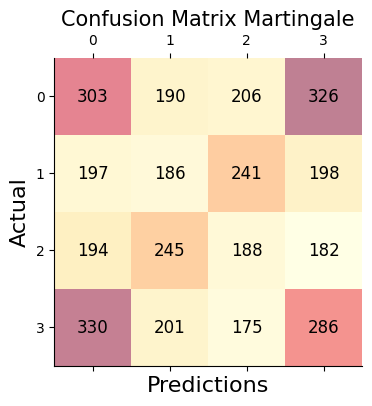

In [142]:
fig, px = plt.subplots(figsize=(4, 4))
px.matshow(confusion_mart, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(confusion_mart.shape[0]):
    for n in range(confusion_mart.shape[1]):
        px.text(x=m, y=n, s=confusion_mart[m, n], va='center', ha='center', size='large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix Martingale', fontsize=15)
plt.show()

<AxesSubplot:>

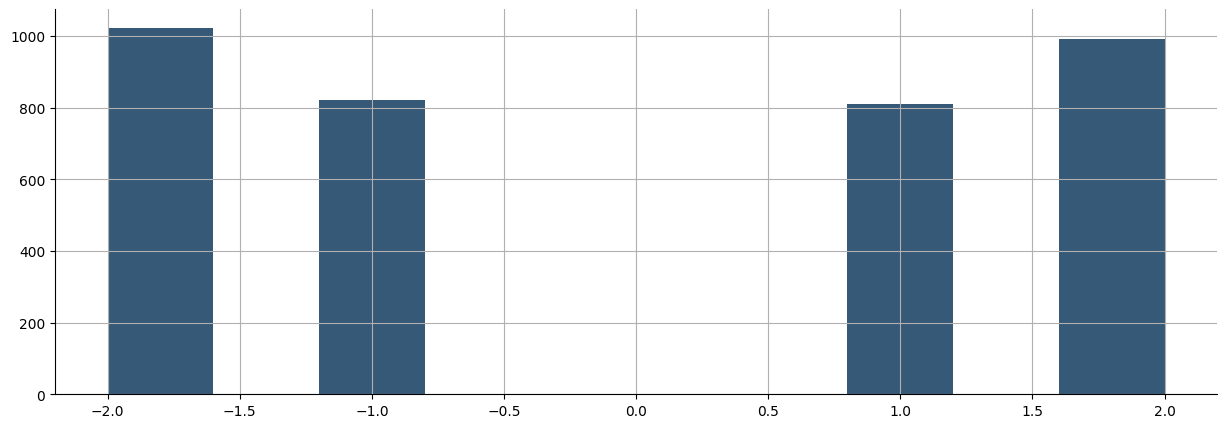

In [143]:
ohlc2['y_hat'].hist()


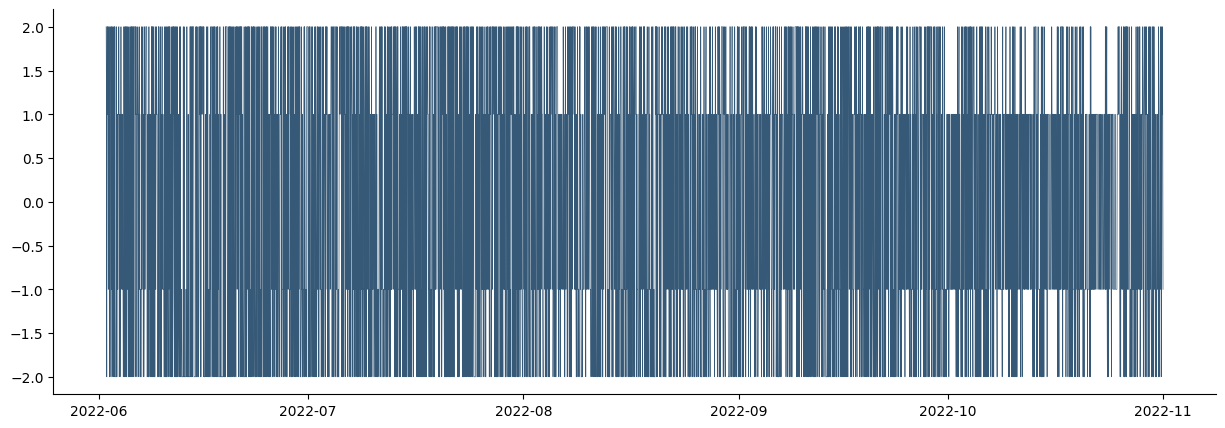

In [144]:
plt.plot(ohlc2['y_hat'])

{'whiskers': [<matplotlib.lines.Line2D at 0x230011fd090>,
 'caps': [<matplotlib.lines.Line2D at 0x230011fd630>,
 'boxes': [<matplotlib.lines.Line2D at 0x230011fcee0>],
 'medians': [<matplotlib.lines.Line2D at 0x230011fdbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230011fdea0>],
 'means': []}

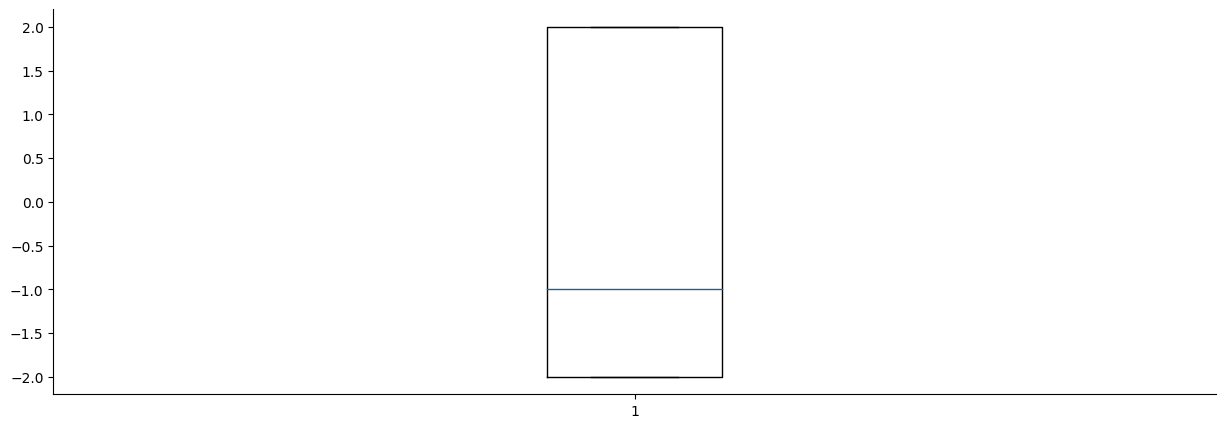

In [145]:
plt.boxplot(ohlc2['y_hat'], notch=None, vert=None, patch_artist=None, widths=None)

In [146]:
corr_y = ohlc2.corrwith(ohlc2['y_hat']).abs()
corr_y

open           0.010323
high           0.011780
low            0.011243
close          0.012817
volume         0.000545
                 ...   
lag_vol_24     0.021597
sum_vol_24     0.000301
mean_vol_24    0.000301
y_hat          1.000000
martingale     0.050707
Length: 237, dtype: float64

In [147]:
X = ohlc2.iloc[:, :-2]
X.head()
y = ohlc2['y_hat'].copy()
y_true = y.copy()
y.head()

timestamp
2022-06-02 00:00:00    2.0
2022-06-02 01:00:00    1.0
2022-06-02 02:00:00   -2.0
2022-06-02 03:00:00    2.0
2022-06-02 04:00:00    2.0
Name: y_hat, dtype: float64

In [148]:
y = ohlc2['y_hat'].copy()
y_true = y.copy()
y.head()

timestamp
2022-06-02 00:00:00    2.0
2022-06-02 01:00:00    1.0
2022-06-02 02:00:00   -2.0
2022-06-02 03:00:00    2.0
2022-06-02 04:00:00    2.0
Name: y_hat, dtype: float64

In [149]:
genetic_prog = genetic_programed_features(p_data=X, p_target=y, p_params=symbolic_params)

# Process description
sym_process = pd.DataFrame(genetic_prog['sym_data']['details'])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    20.64        0.0130882       16          0.07126              N/A     35.94s
   1     3.44         0.027951       64        0.0651948              N/A     44.38s
   2     2.90        0.0293785        3        0.0582865              N/A     30.27s
   3     2.86        0.0298215        3        0.0703934              N/A     15.27s
   4     2.82        0.0297763        3        0.0576791              N/A      0.00s


In [152]:
sym_features = genetic_prog['sym_features']
sym_features
sym_features.iloc[:,:-3]

,sym_0,sym_1,sym_2,sym_3,sym_4,sym_5,sym_6,sym_7,sym_8,sym_9,sym_10,sym_11,sym_12,sym_13,sym_14,sym_15,sym_16
timestamp,,,,,,,,,,,,,,,,,
2022-06-02 00:00:00,44.873452,234.83,83.138884,1690.5516,5.948386,187.3088,-189.56,9.5112,0.500258,2.489065,12.678485,1.000000,-0.002632,85.573449,219.40,11.85,-125.84
2022-06-02 01:00:00,-81.982441,-53.66,334.685512,26135.3664,3.672506,447.6668,-22.10,-22.3552,0.892088,5.337586,1.159986,1.000000,0.003735,64.457977,58.78,32.00,131.88
2022-06-02 02:00:00,-94.158778,770.18,218.797095,5631.0298,5.234007,327.2668,616.16,680.1912,0.872936,4.520048,4.741306,1.000000,0.000477,67.754274,70.11,-752.02,14.26
2022-06-02 03:00:00,-165.803867,668.52,114.603316,867.4220,4.861073,215.4136,375.17,467.0008,1.149961,3.426540,1.593396,1.000000,-0.005296,116.117153,372.90,-561.58,-96.04
2022-06-02 04:00:00,-84.944467,363.80,300.323998,10368.2964,3.906728,393.5588,356.53,343.3896,0.552984,4.543188,9.631843,1.000000,0.005023,64.660943,175.33,-295.38,87.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 19:00:00,44.480035,149.76,49.125193,2830.5744,4.651231,72.2964,-53.42,25.0424,0.012824,1.413423,0.407848,1.000000,-0.000419,107.804767,101.88,5.90,-62.18
2022-10-31 20:00:00,30.991994,24.78,144.166899,1919.3481,3.728492,164.3992,-86.13,-6.8420,0.175564,4.256888,0.358061,754.022334,0.000213,68.142822,142.77,33.62,30.09
2022-10-31 21:00:00,-140.267449,92.13,124.413123,3107.9934,4.395934,139.3340,-22.08,35.3776,1.839642,3.377929,0.002489,1.000000,0.000043,56.447509,34.92,-1.56,5.09


In [154]:
X= pd.merge(X,sym_features.iloc[:,:-3],on= 'timestamp')
X

,open,high,low,close,volume,quote_asset_volume,trades,buy_asset_volume,taker_buy_asset_volume,price,...,sym_7_y,sym_8_y,sym_9_y,sym_10_y,sym_11_y,sym_12,sym_13,sym_14,sym_15,sym_16
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-06-02 00:00:00,29805.84,29817.89,29594.55,29680.00,2826.62933,8.397351e+07,49280.0,1349.38135,4.008587e+07,29685.711142,...,9.5112,0.500258,2.489065,12.678485,1.000000,-0.002632,85.573449,219.40,11.85,-125.84
2022-06-02 01:00:00,29680.01,29888.02,29640.18,29811.89,1742.44118,5.191352e+07,36801.0,927.12865,2.761999e+07,29831.049628,...,-22.3552,0.892088,5.337586,1.159986,1.000000,0.003735,64.457977,58.78,32.00,131.88
2022-06-02 02:00:00,29811.90,29903.74,29778.12,29826.16,1292.33107,3.855034e+07,28861.0,680.50268,2.029915e+07,29873.385712,...,680.1912,0.872936,4.520048,4.741306,1.000000,0.000477,67.754274,70.11,-752.02,14.26
2022-06-02 03:00:00,29826.16,29856.93,29703.05,29730.12,1690.59886,5.034379e+07,34094.0,749.74232,2.232716e+07,0.000000,...,467.0008,1.149961,3.426540,1.593396,1.000000,-0.005296,116.117153,372.90,-561.58,-96.04
2022-06-02 04:00:00,29730.12,29824.11,29650.93,29817.24,1223.11546,3.639184e+07,31720.0,599.63297,1.784136e+07,29695.672636,...,343.3896,0.552984,4.543188,9.631843,1.000000,0.005023,64.660943,175.33,-295.38,87.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 19:00:00,20433.90,20438.01,20360.37,20371.72,12193.69642,2.487188e+08,253179.0,5944.94510,1.212673e+08,20468.037120,...,25.0424,0.012824,1.413423,0.407848,1.000000,-0.000419,107.804767,101.88,5.90,-62.18
2022-10-31 20:00:00,20371.40,20441.99,20353.77,20401.49,7588.08696,1.547771e+08,173815.0,3808.44259,7.768457e+07,0.000000,...,-6.8420,0.175564,4.256888,0.358061,754.022334,0.000213,68.142822,142.77,33.62,30.09
2022-10-31 21:00:00,20401.49,20430.80,20390.23,20406.58,4043.39784,8.252233e+07,117665.0,2038.12129,4.159776e+07,20344.977408,...,35.3776,1.839642,3.377929,0.002489,1.000000,0.000043,56.447509,34.92,-1.56,5.09


            open      high       low     close    volume  quote_asset_volume  \
open    1.000000  0.999068  0.999043  0.998566 -0.279820           -0.191414   
high    0.999068  1.000000  0.998345  0.999147 -0.268855           -0.179572   
low     0.999043  0.998345  1.000000  0.999260 -0.291648           -0.204054   
close   0.998566  0.999147  0.999260  1.000000 -0.279761           -0.191414   
volume -0.279820 -0.268855 -0.291648 -0.279761  1.000000            0.991275   
...          ...       ...       ...       ...       ...                 ...   
sym_12 -0.041343 -0.019005 -0.016970  0.001257  0.003703           -0.000694   
sym_13 -0.191021 -0.202910 -0.219052 -0.220245  0.428381            0.412887   
sym_14  0.157623  0.167486  0.148559  0.156375 -0.000318            0.024939   
sym_15  0.007666  0.007228  0.008256  0.007937 -0.011417           -0.012619   
sym_16 -0.048882 -0.020635 -0.018062  0.004666  0.007290            0.004237   

          trades  buy_asset_volume  tak

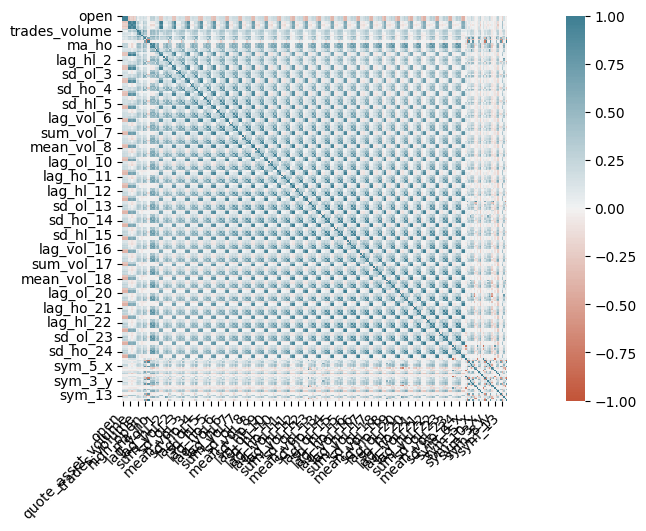

In [155]:
# %% Heatmaps
# Heat map
correlation = X.corr()
print(correlation)

heat = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heat.set_xticklabels(
    heat.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

        open  high  low  close  volume  quote_asset_volume   trades  \
open     1.0   0.0 -0.6   -1.0     NaN                 NaN      NaN   
high     0.0   1.0 -0.8    0.0     NaN                 NaN      NaN   
low     -0.6  -0.8  1.0    0.6     NaN                 NaN      NaN   
close   -1.0   0.0  0.6    1.0     NaN                 NaN      NaN   
volume   NaN   NaN  NaN    NaN     1.0            0.860335 -0.71056   
...      ...   ...  ...    ...     ...                 ...      ...   
sym_12   NaN   NaN  NaN    NaN     NaN                 NaN      NaN   
sym_13   NaN   NaN  NaN    NaN     NaN                 NaN      NaN   
sym_14   NaN   NaN  NaN    NaN     NaN                 NaN      NaN   
sym_15   NaN   NaN  NaN    NaN     NaN                 NaN      NaN   
sym_16   NaN   NaN  NaN    NaN     NaN                 NaN      NaN   

        buy_asset_volume  taker_buy_asset_volume  price  ...  sym_7_y  \
open                 NaN                     NaN    NaN  ...      NaN   
h

<AxesSubplot:>

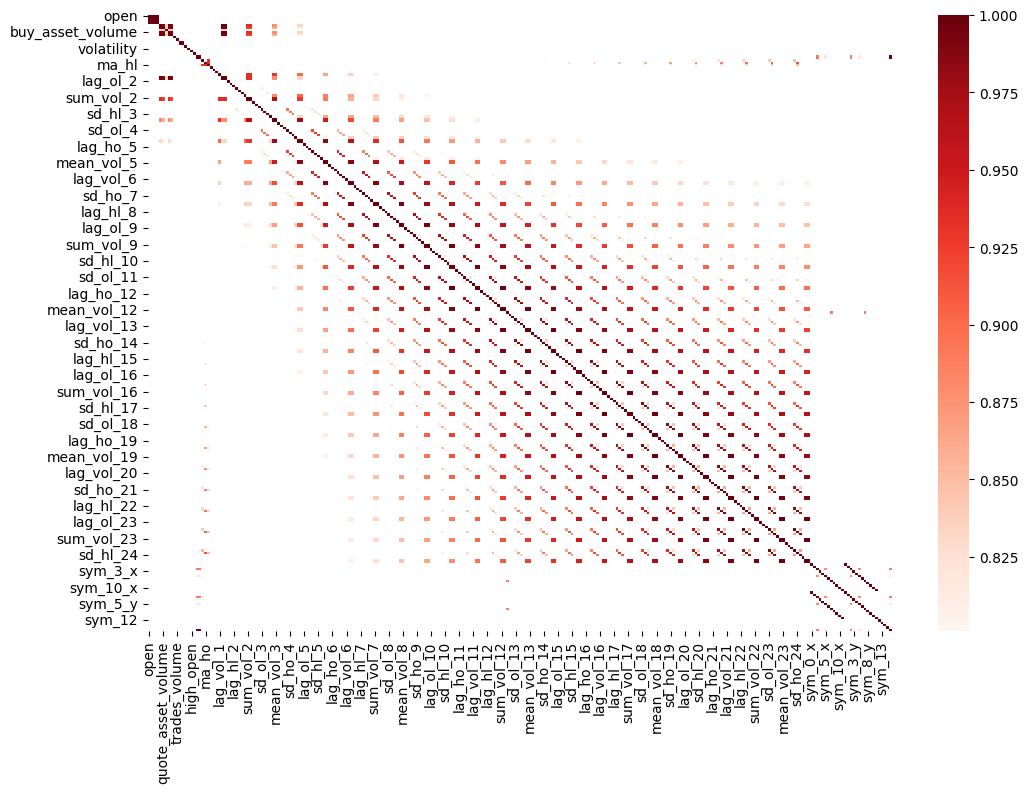

In [156]:
corr = correlation[correlation >= .80]
corr2 = corr.corr(method='spearman')
print(corr2)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="Reds")

            open      high       low     close  volume  quote_asset_volume  \
open    1.000000 -0.041485 -0.147332 -0.954077     NaN                 NaN   
high   -0.041485  1.000000 -0.981595 -0.035189     NaN                 NaN   
low    -0.147332 -0.981595  1.000000  0.205160     NaN                 NaN   
close  -0.954077 -0.035189  0.205160  1.000000     NaN                 NaN   
volume       NaN       NaN       NaN       NaN     1.0            0.991692   
...          ...       ...       ...       ...     ...                 ...   
sym_12       NaN       NaN       NaN       NaN     NaN                 NaN   
sym_13       NaN       NaN       NaN       NaN     NaN                 NaN   
sym_14       NaN       NaN       NaN       NaN     NaN                 NaN   
sym_15       NaN       NaN       NaN       NaN     NaN                 NaN   
sym_16       NaN       NaN       NaN       NaN     NaN                 NaN   

          trades  buy_asset_volume  taker_buy_asset_volume  pri

<AxesSubplot:>

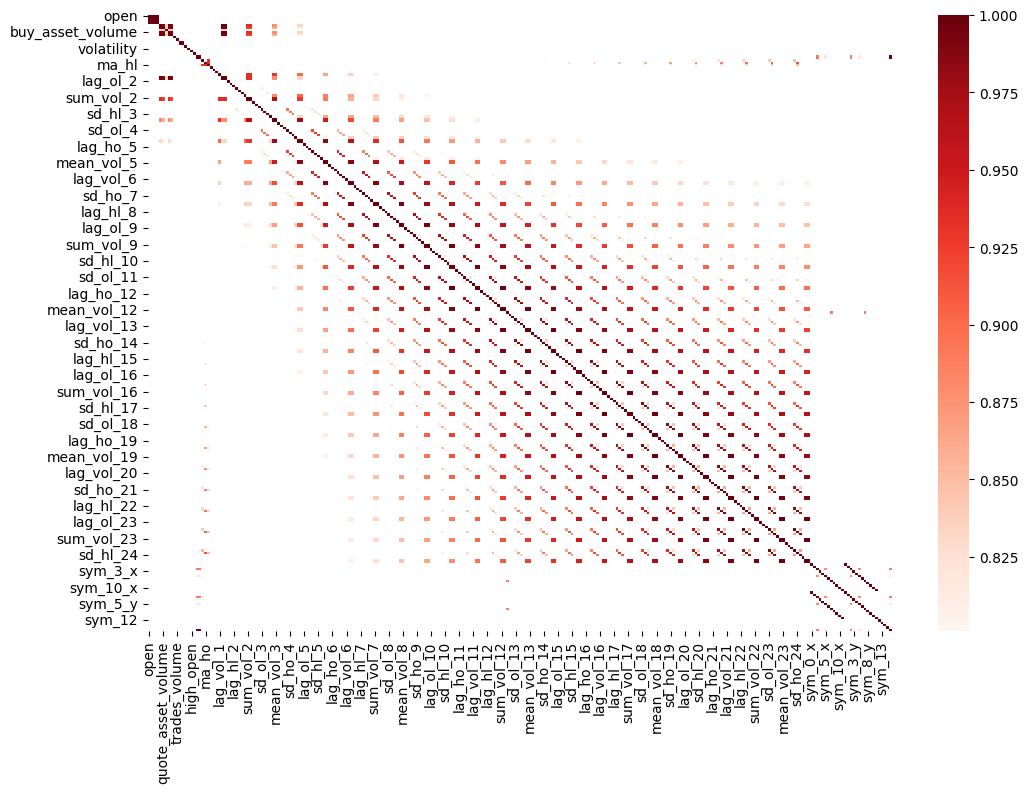

In [157]:
corr = correlation[correlation >= .80]
corr2 = corr.corr(method='pearson')
print(corr2)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="Reds")


In [158]:
cor_matrix = X.corr().abs()
print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
print(upper_tri)

            open      high       low     close    volume  quote_asset_volume  \
open    1.000000  0.999068  0.999043  0.998566  0.279820            0.191414   
high    0.999068  1.000000  0.998345  0.999147  0.268855            0.179572   
low     0.999043  0.998345  1.000000  0.999260  0.291648            0.204054   
close   0.998566  0.999147  0.999260  1.000000  0.279761            0.191414   
volume  0.279820  0.268855  0.291648  0.279761  1.000000            0.991275   
...          ...       ...       ...       ...       ...                 ...   
sym_12  0.041343  0.019005  0.016970  0.001257  0.003703            0.000694   
sym_13  0.191021  0.202910  0.219052  0.220245  0.428381            0.412887   
sym_14  0.157623  0.167486  0.148559  0.156375  0.000318            0.024939   
sym_15  0.007666  0.007228  0.008256  0.007937  0.011417            0.012619   
sym_16  0.048882  0.020635  0.018062  0.004666  0.007290            0.004237   

          trades  buy_asset_volume  tak

C:\Users\Emilio\AppData\Local\Temp\ipykernel_14440\3860065349.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [159]:
# .5 according to JF, but not many features after that.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= .80)]
print();
print(to_drop)


['high', 'low', 'close', 'quote_asset_volume', 'trades', 'buy_asset_volume', 'taker_buy_asset_volume', 'quote_volume', 'co', 'ma_hl', 'sum_vol_1', 'mean_vol_1', 'sum_vol_2', 'mean_vol_2', 'sd_ol_3', 'sd_hl_3', 'sum_vol_3', 'mean_vol_3', 'sd_ol_4', 'sd_ho_4', 'sd_hl_4', 'sum_vol_4', 'mean_vol_4', 'sd_ol_5', 'sd_ho_5', 'sd_hl_5', 'sum_vol_5', 'mean_vol_5', 'sd_ol_6', 'sd_ho_6', 'sd_hl_6', 'sum_vol_6', 'mean_vol_6', 'sd_ol_7', 'sd_ho_7', 'sd_hl_7', 'sum_vol_7', 'mean_vol_7', 'sd_ol_8', 'sd_ho_8', 'sd_hl_8', 'sum_vol_8', 'mean_vol_8', 'sd_ol_9', 'sd_ho_9', 'sd_hl_9', 'sum_vol_9', 'mean_vol_9', 'sd_ol_10', 'sd_ho_10', 'sd_hl_10', 'sum_vol_10', 'mean_vol_10', 'sd_ol_11', 'sd_ho_11', 'sd_hl_11', 'sum_vol_11', 'mean_vol_11', 'sd_ol_12', 'sd_ho_12', 'sd_hl_12', 'sum_vol_12', 'mean_vol_12', 'sd_ol_13', 'sd_ho_13', 'sd_hl_13', 'sum_vol_13', 'mean_vol_13', 'sd_ol_14', 'sd_ho_14', 'sd_hl_14', 'sum_vol_14', 'mean_vol_14', 'sd_ol_15', 'sd_ho_15', 'sd_hl_15', 'sum_vol_15', 'mean_vol_15', 'sd_ol_16', 

In [160]:
x = X.drop(X[to_drop], axis=1)
print();
print(x.head())
x.head()


                         open      volume         price  trades_volume  \
timestamp                                                                
2022-06-02 00:00:00  29805.84  2826.62933  29685.711142            2.0   
2022-06-02 01:00:00  29680.01  1742.44118  29831.049628            1.0   
2022-06-02 02:00:00  29811.90  1292.33107  29873.385712            1.0   
2022-06-02 03:00:00  29826.16  1690.59886      0.000000            0.0   
2022-06-02 04:00:00  29730.12  1223.11546  29695.672636            1.0   

                     base_volume  mean_gas_value  volatility  high_open  \
timestamp                                                                 
2022-06-02 00:00:00     1.447088        0.009546      223.34      12.05   
2022-06-02 01:00:00     0.134213        0.016814      247.84     208.01   
2022-06-02 02:00:00     0.770000        0.014173      125.62      91.84   
2022-06-02 03:00:00     0.000000        0.000000      153.88      30.77   
2022-06-02 04:00:00     0.7452

,open,volume,price,trades_volume,base_volume,mean_gas_value,volatility,high_open,open_low,close_open,...,sym_4_x,sym_6_x,sym_8_x,sym_9_x,sym_10_x,sym_11_x,sym_12,sym_13,sym_14,sym_15
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-06-02 00:00:00,29805.84,2826.62933,29685.711142,2.0,1.447088,0.009546,223.34,12.05,211.29,-125.84,...,5.948386,-189.56,0.500258,2.489065,12.678485,1.0,-0.002632,85.573449,219.40,11.85
2022-06-02 01:00:00,29680.01,1742.44118,29831.049628,1.0,0.134213,0.016814,247.84,208.01,39.83,131.88,...,3.672506,-22.10,0.892088,5.337586,1.159986,1.0,0.003735,64.457977,58.78,32.00
2022-06-02 02:00:00,29811.90,1292.33107,29873.385712,1.0,0.770000,0.014173,125.62,91.84,33.78,14.26,...,5.234007,616.16,0.872936,4.520048,4.741306,1.0,0.000477,67.754274,70.11,-752.02
2022-06-02 03:00:00,29826.16,1690.59886,0.000000,0.0,0.000000,0.000000,153.88,30.77,123.11,-96.04,...,4.861073,375.17,1.149961,3.426540,1.593396,1.0,-0.005296,116.117153,372.90,-561.58
2022-06-02 04:00:00,29730.12,1223.11546,29695.672636,1.0,0.745203,0.006944,173.18,93.99,79.19,87.12,...,3.906728,356.53,0.552984,4.543188,9.631843,1.0,0.005023,64.660943,175.33,-295.38


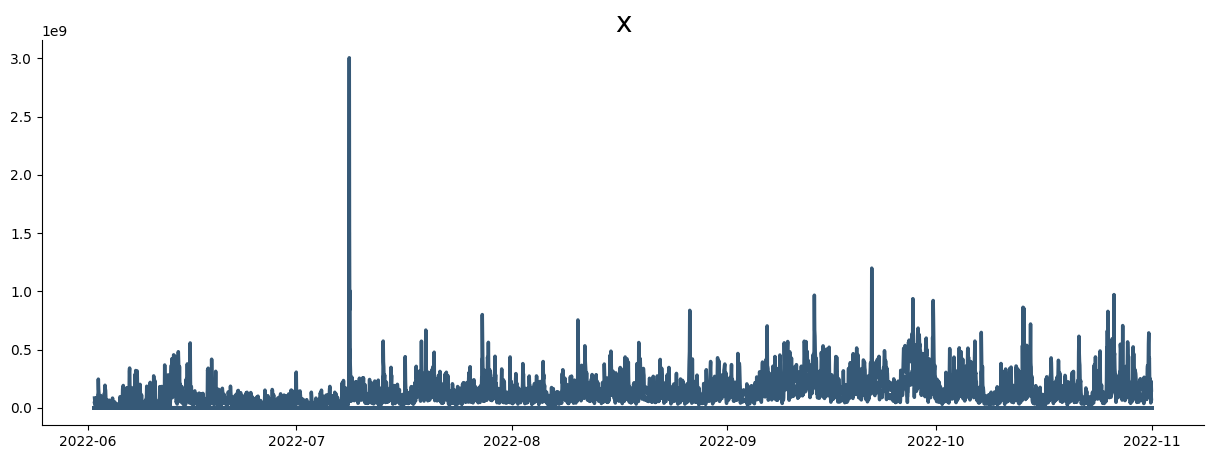

In [161]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
plt.title('x', size=20)
plt.plot(X);

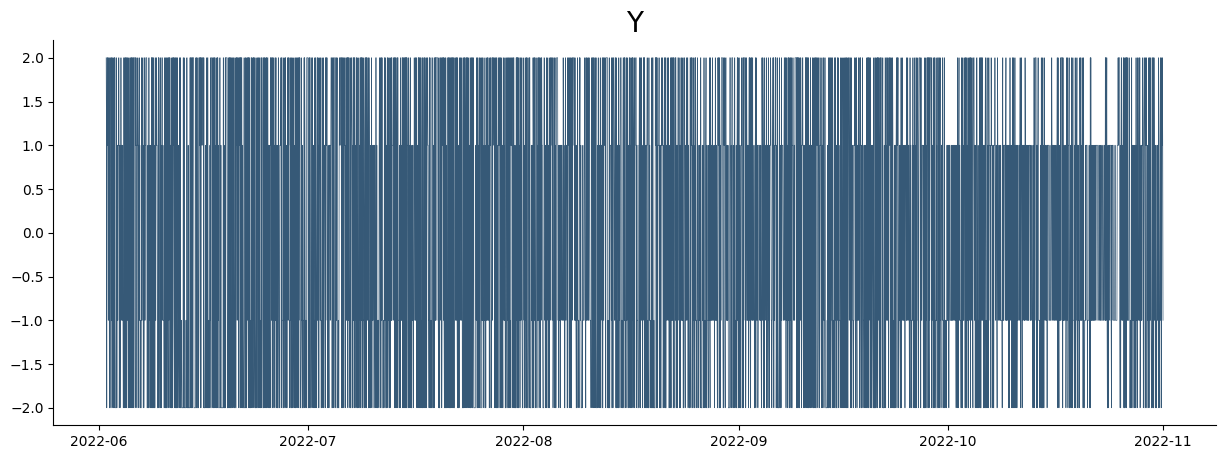

In [162]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = .5
plt.title('Y', size=20)
plt.plot(y);

In [165]:
# Normalizer and scaler
scale = MinMaxScaler().fit(x)
X_scale = scale.transform(x)
X_scale = pd.DataFrame(X_scale, index=x.index, columns=x.columns)
X_scale.head()
transformer = Normalizer(norm='max').fit(X_scale)
transformed = transformer.transform(X_scale)
X_normalized = pd.DataFrame(transformed, index=x.index, columns=x.columns)
X_normalized.head()
X_norm_scale = X_normalized.copy()
X_norm_scale

,open,volume,price,trades_volume,base_volume,mean_gas_value,volatility,high_open,open_low,close_open,...,sym_4_x,sym_6_x,sym_8_x,sym_9_x,sym_10_x,sym_11_x,sym_12,sym_13,sym_14,sym_15
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-06-02 00:00:00,0.932133,0.019109,1.000000,0.047421,0.020639,0.017689,0.100945,0.009283,0.165649,0.503726,...,0.634923,0.648077,0.029931,0.385814,0.214509,0.000000,0.608771,0.170642,0.115217,0.553729
2022-06-02 01:00:00,0.917862,0.010603,1.000000,0.023595,0.001905,0.031007,0.112095,0.159461,0.031074,0.624368,...,0.232292,0.700072,0.053115,0.823314,0.019518,0.000000,0.683164,0.127771,0.030714,0.559653
2022-06-02 02:00:00,0.926745,0.007100,1.000000,0.023562,0.010913,0.026099,0.053944,0.070305,0.026317,0.567383,...,0.505700,0.908991,0.051901,0.696222,0.079706,0.000000,0.642673,0.134144,0.036583,0.223890
2022-06-02 03:00:00,1.000000,0.010978,0.000000,0.000000,0.000000,0.000000,0.072591,0.025387,0.103369,0.554807,...,0.474565,0.894259,0.073688,0.568833,0.028860,0.000000,0.617155,0.248202,0.209733,0.328993
2022-06-02 04:00:00,0.925939,0.006603,1.000000,0.023703,0.010625,0.012864,0.076969,0.072382,0.062063,0.605738,...,0.274656,0.828533,0.033075,0.703974,0.162905,0.000000,0.702000,0.128760,0.092042,0.421495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31 19:00:00,0.294244,0.132949,0.994745,0.034208,0.000013,0.007502,0.045266,0.004568,0.083168,0.770820,...,0.585873,1.000000,0.001107,0.316080,0.009936,0.000000,0.917266,0.310357,0.077184,0.795187
2022-10-31 20:00:00,0.291796,0.082423,0.000000,0.000000,0.000000,0.000000,0.053388,0.079699,0.020257,0.847958,...,0.356592,1.000000,0.015395,0.967060,0.008859,0.044562,0.943129,0.198985,0.109881,0.825271
2022-10-31 21:00:00,0.286326,0.040649,0.974186,0.033704,0.000089,0.008731,0.019439,0.032095,0.012548,0.805351,...,0.513216,1.000000,0.156457,0.744259,0.000040,0.000000,0.911761,0.159730,0.026060,0.778904


In [166]:
test_size = int(len(X_norm_scale) * .30)
trial_size = int(len(X_norm_scale) * .10)
X_train = X_norm_scale[:-test_size].copy()
X_test = X_norm_scale[-test_size:].copy()
X_test = X_test[:-trial_size].copy()
X_trial = X_test[-trial_size:].copy()

X_train2 = X_train.copy()
X_test2 = X_test.copy()
X_trial2 = X_trial.copy()

X_train3 = X_train.copy()
X_test3 = X_test.copy()
X_trial3 = X_trial.copy()

X_train4 = X_train.copy()
X_test4 = X_test.copy()
X_trial4 = X_trial.copy()

X_train5 = X_train.copy()
X_test5 = X_test.copy()
X_trial5 = X_trial.copy()

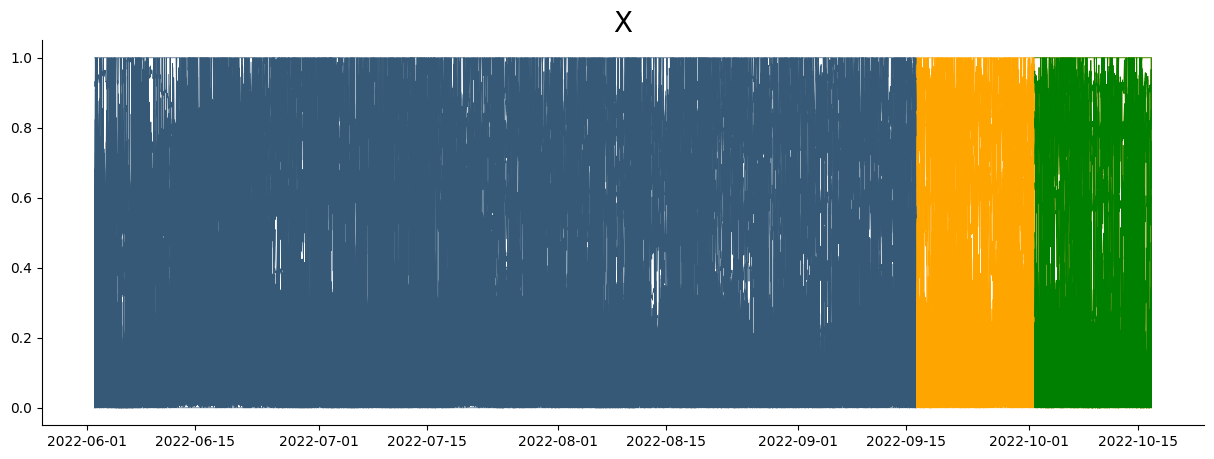

In [167]:
plt.title('X', size=20)
plt.plot(X_train)  # ,label='Training set')
plt.plot(X_test, label='Test set', color='orange')
plt.plot(X_trial,label= 'Trial set',color='green')
plt.legend;


In [168]:
y_train = y[:-test_size].copy()
y_test = y[-test_size:].copy()
y_test = y_test[:-trial_size].copy()
y_trial = y_test[-trial_size:].copy()

y_train2 = y_train.copy()
y_test2 = y_test.copy()
y_trial2 = y_trial.copy()

y_train3 = y_train.copy()
y_test3 = y_test.copy()
y_trial3 = y_trial.copy()

y_train4 = y_train.copy()
y_test4 = y_test.copy()
y_trial4 = y_trial.copy()

y_train5 = y_train.copy()
y_test5 = y_test.copy()
y_trial5 = y_trial.copy()

Y_train_dum = pd.get_dummies(y_train5, prefix='y')
Y_test_dum = pd.get_dummies(y_test5, prefix='y')
Y_trial_dum = pd.get_dummies(y_trial5,prefix='y')

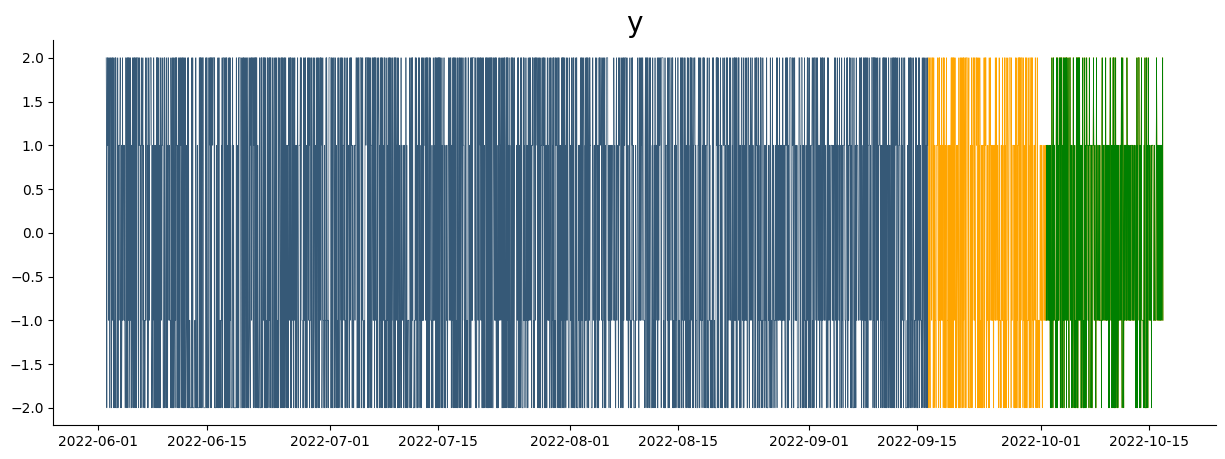

In [169]:
plt.title('y', size=20)
plt.plot(y_train, label='Training set')
plt.plot(y_test, label='Test set', color='orange')
plt.plot(y_trial,label='Trial set',color='green')
plt.legend;


In [170]:
#naive bayes
# %% Naive Bayes
print(X_train.shape, y_train.shape)
# instantiate the model
gnb = GaussianNB()
# gnb = CategoricalNB()
# pgmpy()

# fit the model
gnb.fit(X_train2, y_train2)

(2554, 124) (2554,)


GaussianNB()

In [171]:
y_train

timestamp
2022-06-02 00:00:00    2.0
2022-06-02 01:00:00    1.0
2022-06-02 02:00:00   -2.0
2022-06-02 03:00:00    2.0
2022-06-02 04:00:00    2.0
                      ... 
2022-09-16 05:00:00    1.0
2022-09-16 06:00:00   -1.0
2022-09-16 07:00:00   -2.0
2022-09-16 08:00:00    2.0
2022-09-16 09:00:00    1.0
Name: y_hat, Length: 2554, dtype: float64

In [172]:
y_pred2 = gnb.predict(X_test2)

In [174]:
accuracy_naive = (accuracy_score(y_test2, y_pred2)) * 100
recall_naive = recall_score(y_test2, y_pred2, average='weighted') * 100
precision_naive = precision_score(y_test2, y_pred2, average='weighted', zero_division=0) * 100
f1_naive = f1_score(y_test2, y_pred2, average='weighted') * 100
balanced_naive = balanced_accuracy_score(y_test2, y_pred2) * 100
print('Accuracy:', accuracy_naive, '%')
print('Recall:', recall_naive, '%')
print('Precision:', precision_naive, '%')
print('F1:', f1_naive, '%')
print('Balanced Accuracy:', balanced_naive, '%')

Accuracy: 31.232876712328768 %
Recall: 31.232876712328768 %
Precision: 33.803136549960314 %
F1: 25.41662740442306 %
Balanced Accuracy: 27.739701736696937 %


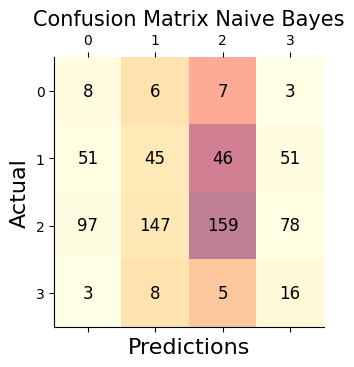

In [175]:
y_pred_train = gnb.predict(X_train2)
conf_mat = confusion_matrix(y_test2, y_pred2)
fig, px = plt.subplots(figsize=(3.5, 3.5))
px.matshow(conf_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(conf_mat.shape[0]):
    for n in range(conf_mat.shape[1]):
        px.text(x=m, y=n, s=conf_mat[m, n], va='center', ha='center', size='large')
# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix Naive Bayes', fontsize=15)
plt.show()

In [176]:
y_pred2_trial = gnb.predict(X_trial2)

In [177]:
accuracy_naive2 = (accuracy_score(y_trial2, y_pred2_trial)) * 100
recall_naive2 = recall_score(y_trial2, y_pred2_trial, average='weighted') * 100
precision_naive2 = precision_score(y_trial2, y_pred2_trial, average='weighted', zero_division=0) * 100
f1_naive2 = f1_score(y_trial2, y_pred2_trial, average='weighted') * 100
balanced_naive2 = balanced_accuracy_score(y_trial2, y_pred2_trial) * 100
print('Accuracy:', accuracy_naive2, '%')
print('Recall:', recall_naive2, '%')
print('Precision:', precision_naive2, '%')
print('F1:', f1_naive2, '%')
print('Balanced Accuracy:', balanced_naive2, '%')

Accuracy: 34.61538461538461 %
Recall: 34.61538461538461 %
Precision: 26.58903068762224 %
F1: 26.30439368296149 %
Balanced Accuracy: 25.331044719370592 %


In [178]:
# Logistic regression simple
logistic_model_simple = LogisticRegression(max_iter=1000000)
logistic_model_simple.fit(X_train,y_train)

LogisticRegression(max_iter=1000000)

In [179]:
# logistic_model.predict_proba((X[:2, :])
y_pred = logistic_model_simple.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
logistic_model_simple.score(x, y)
confusion_mat = confusion_matrix(y_test, y_pred)
print(accuracy)


31.917808219178085


In [180]:
logistic_model_simple.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [181]:
# si fueron 0 se quitaron por efecto de la regularizacion L1 y son:
# si
coef = logistic_model_simple.coef_
print(logistic_model_simple.intercept_)
print(coef)

[ 0.73946234 -0.65520148 -0.41939293  0.33513208]
[[-0.0663085   0.40519631  0.08040679  0.46216268  0.77733308 -0.150349
   0.0211853  -0.10838413  0.13639782 -0.11804844 -0.04574246  0.21919575
   0.19759333 -0.24005231 -0.02315473 -0.05395916 -0.01964013  0.08424573
   0.04554727  0.30369029 -0.48024179  0.02228503 -0.21438189 -0.10586776
   0.38448874  0.17912808  0.37387287 -0.10818286 -0.4560544   0.04251774
  -0.24611343 -0.59712131 -0.29655103  0.43501641  0.09431125  0.68541999
  -0.01497701  0.17333508  0.10360694  0.02289224  0.03431302 -0.11683492
  -0.07148351  0.35727181 -0.11138414  0.13133592  0.01885844  0.33734731
  -0.10014134  0.26979506  0.11152598 -0.07580593  0.67906316  0.10783763
   0.48571311 -0.45353719 -0.18059569  0.15468165 -0.00882442 -0.19986448
  -0.29387815 -0.07883636 -0.22255854 -0.07605185 -0.05875553 -0.01823156
  -0.04179361  0.57192801 -0.30312964  0.12132322 -0.10412965 -0.18666949
   0.12758911 -0.13089453  0.00186792 -0.39480093 -0.09901225  0

In [182]:
predict_ = logistic_model_simple.predict_proba(X_train)
print(predict_)

[[0.45776083 0.15714035 0.13121086 0.25388796]
 [0.28708223 0.19866747 0.1559912  0.3582591 ]
 [0.27731278 0.20561652 0.09738723 0.41968347]
 ...
 [0.20249264 0.29496421 0.21544214 0.28710101]
 [0.27805536 0.21498344 0.29406318 0.21289802]
 [0.25231124 0.32178097 0.22529992 0.20060788]]


(1.0, 30000.0, -3.0, 3.0)

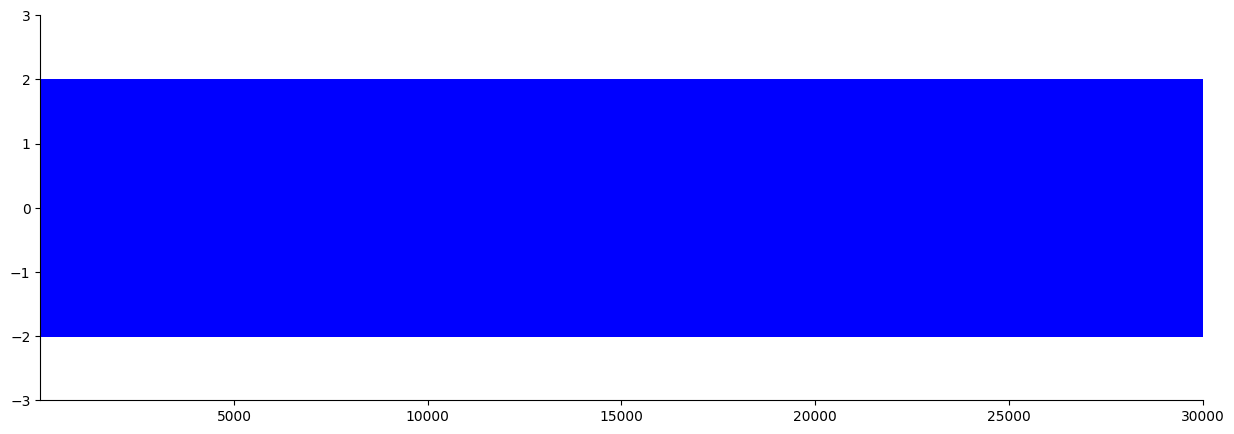

In [183]:
plt.plot(X_test, y_pred, 'r')
plt.plot(X, y_true, 'b')
plt.axis([1, 30000, -3, 3])


In [184]:
y_pred_simple = logistic_model_simple.predict(X_test)
accuracy_logistic_simple = accuracy_score(y_test, y_pred) * 100
logistic_model_simple.score(x, y)
confusion_mat = confusion_matrix(y_test, y_pred)
recall_logistic_simple = recall_score(y_test, y_pred, average='weighted') * 100
precision_logistic_simple = precision_score(y_test, y_pred, average='weighted', zero_division=0) * 100
f1_logistic_simple = f1_score(y_test, y_pred, average='weighted') * 100
balanced_logistic_simple = balanced_accuracy_score(y_test, y_pred) * 100

print('Accuracy:', accuracy_logistic_simple, '%')
print('Recall:', recall_logistic_simple, '%')
print('Precision:', precision_logistic_simple, '%')
print('F1:', f1_logistic_simple, '%')
print('Balanced Accuracy:', balanced_logistic_simple, '%')
print("Confusion Matrix:")

print(confusion_mat)


Accuracy: 31.917808219178085 %
Recall: 31.917808219178085 %
Precision: 31.303648813990893 %
F1: 30.524489251473213 %
Balanced Accuracy: 30.69519929370339 %
Confusion Matrix:
[[ 51  31  55  22]
 [ 35  42 109  20]
 [ 48  40 113  16]
 [ 49  31  41  27]]


In [185]:
y_pred_simple2 = logistic_model_simple.predict(X_trial)
accuracy = accuracy_score(y_trial, y_pred_simple2) * 100
logistic_model_simple.score(x, y)
confusion_mat = confusion_matrix(y_trial, y_pred_simple2)
print(accuracy)

33.51648351648351


In [ ]:
# Regression with Elastic Net and hiper parameters optimization


In [186]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [187]:
pipelineLR = make_pipeline(
LogisticRegression(random_state=False, penalty='elasticnet',solver ='saga', max_iter=1000000, C=1
 ))
param_grid_lr = [{
    'logisticregression__l1_ratio':[.40,.45,.50,.55,.60,.65,.70],
    'logisticregression__class_weight':[None,'balanced'],
    'logisticregression__C':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
    'logisticregression__solver':['saga']
}]
gd_lm = GridSearchCV(estimator=pipelineLR,
                     param_grid=param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)
gd_lm.fit(X_train3, y_train3)
print(gd_lm.best_score_)

0.33397058823529413


In [191]:
gd_lm.best_params_

{'logisticregression__C': 0.05,
 'logisticregression__class_weight': None,
 'logisticregression__l1_ratio': 0.5,
 'logisticregression__solver': 'saga'}

In [192]:
clfLR = gd_lm.best_estimator_
clfLR

Pipeline(steps=[('logisticregression',
                 LogisticRegression(C=0.05, l1_ratio=0.5, max_iter=1000000,
                                    penalty='elasticnet', random_state=False,
                                    solver='saga'))])

In [204]:
clfLR.score(X_test3, y_test3)

0.2219178082191781

In [205]:
logistic_model = LogisticRegression(random_state=False, penalty='elasticnet',
                                            solver='saga', l1_ratio=0.5, max_iter=1000000, C=0.1,
                                            class_weight= None, )
logistic_model.fit(X_train3, y_train3)

LogisticRegression(C=0.1, l1_ratio=0.5, max_iter=1000000, penalty='elasticnet',
                   random_state=False, solver='saga')

In [207]:
y_pred3 = logistic_model.predict(X_test3)
accuracy = accuracy_score(y_test3, y_pred3) * 100
logistic_model.score(x, y)
confusion_mat = confusion_matrix(y_test3, y_pred3)

y_pred_trial = logistic_model.predict(X_trial3)
accuracy_trial = accuracy_score(y_trial3, y_pred_trial) * 100
logistic_model.score(x, y)
print(accuracy)
print(accuracy_trial)

27.945205479452056
28.57142857142857


In [208]:
pickle.dump(clfLR, open('logg3.pkl', 'wb'))

In [209]:
accuracy_logistic= accuracy_score(y_test3, y_pred3) * 100

recall_logistic = recall_score(y_test3, y_pred3, average='weighted') * 100
precision_logistic = precision_score(y_test3, y_pred3, average='weighted', zero_division=0) * 100
f1_logistic = f1_score(y_test3, y_pred3, average='weighted') * 100
balanced_logistic = balanced_accuracy_score(y_test3, y_pred3) * 100

print('Accuracy:', accuracy_logistic, '%')
print('Recall:', recall_logistic, '%')
print('Precision:', precision_logistic, '%')
print('F1:', f1_logistic, '%')
print('Balanced Accuracy:', balanced_logistic, '%')
print("Confusion Matrix:")

print(confusion_mat)


Accuracy: 27.945205479452056 %
Recall: 27.945205479452056 %
Precision: 50.659736826312674 %
F1: 23.56235417327521 %
Balanced Accuracy: 30.361732955001546 %
Confusion Matrix:
[[ 80   0  14  65]
 [ 76   1  56  73]
 [ 59   0  58 100]
 [ 66   0  17  65]]


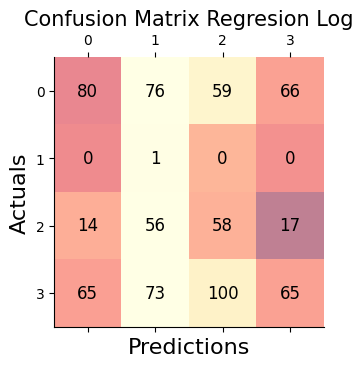

In [210]:
fig, px = plt.subplots(figsize=(3.5, 3.5))
px.matshow(confusion_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(confusion_mat.shape[0]):
    for n in range(confusion_mat.shape[1]):
        px.text(x=m, y=n, s=confusion_mat[m, n], va='center', ha='center', size='large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix Regresion Log', fontsize=15)
plt.show()

# Random Forest

In [211]:
seed = 4

In [218]:
pipelineRFC = make_pipeline(
RandomForestClassifier(max_depth=None,min_samples_split=2,n_estimators=1000))

param_grid_rfc = [{
    'randomforestclassifier__max_features':['sqrt', 'log2', None],
    'randomforestclassifier__criterion':['gini','entropy','log_loss'],
    #'ranfomforestclassifier__n_estimators':[100, 500,1000]    
}]

gsrfc =GridSearchCV(estimator= pipelineRFC,
                   param_grid=param_grid_rfc,
                   scoring='accuracy',
                   cv=10,
                   n_jobs=1)
gs_rfc =gsrfc.fit(X_train4,y_train4)
print(gs_rfc.best_score_)

KeyboardInterrupt: 

In [214]:
print(gs_rfc.best_params_)


{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_features': 'sqrt'}


In [215]:
clfRFC = gs_rfc.best_estimator_
clfRFC

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(n_estimators=1000))])

In [219]:
clfRFC.score(X_test4, y_test4)

0.3273972602739726

In [217]:
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=None,
                             max_features='sqrt', min_samples_split=2,
                             oob_score=True,n_jobs=4, criterion= 'gini')

# Train the model using the training sets
clf.fit(X_train4, y_train4)


RandomForestClassifier(n_estimators=1000, n_jobs=4, oob_score=True)

In [220]:
pickle.dump(clfRFC, open('forest3.pkl', 'wb'))

In [221]:
# performing predictions on the test dataset
y_pred4 = clf.predict(X_test4)
accuracy_forest = accuracy_score(y_test4, y_pred4) * 100
print(clf.score(X_test4, y_test4))

0.32054794520547947


In [222]:
# performing predictions on the trial dataset
y_pred4_trial = clf.predict(X_trial4)
accuracy_forest_trial = accuracy_score(y_trial4, y_pred4_trial) * 100
print(clf.score(X_trial4, y_trial4))

0.3131868131868132


In [223]:
confusion_mat = confusion_matrix(y_test4, y_pred4)

In [224]:
recall_forest = recall_score(y_test4, y_pred4, average='weighted') * 100
precision_forest = precision_score(y_test4, y_pred4, average='weighted', zero_division=0) * 100
f1_forest = f1_score(y_test4, y_pred4, average='weighted') * 100
balanced_forest = balanced_accuracy_score(y_test4, y_pred4) * 100

print('Accuracy:', accuracy_forest, '%')
print('Recall:', recall_forest, '%')
print('Precision:', precision_forest, '%')
print('F1:', f1_forest, '%')
print('Balanced Accuracy:', balanced_forest, '%')
print("Confusion Matrix:")

print(confusion_mat)

Accuracy: 32.054794520547944 %
Recall: 32.054794520547944 %
Precision: 32.50978872994413 %
F1: 31.26920698773807 %
Balanced Accuracy: 31.69889554285846 %
Confusion Matrix:
[[ 51  22  45  41]
 [ 38  38  93  37]
 [ 49  30 101  37]
 [ 54  16  34  44]]


## Multilayer perceptron for Classification

In [225]:
n_inputs = len(list(X_train5.columns))
neuron_quant = [n_inputs, n_inputs+2,n_inputs+4,n_inputs+8,n_inputs+16,n_inputs+32,n_inputs+64]
quant_hidden = [1,2]
learning_rate = [0.01,0.1,0.5,1]
batch_size = [1,8,16]
import tensorflow as tf
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
from  sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from keras.callbacks import EarlyStopping

In [226]:

import tensorflow_addons as tfa


In [232]:
recc = []
fitness=0
model_best =[]
for i in neuron_quant:
    for j in quant_hidden:
        for k in batch_size:
                
               

                # Agregar: learning rate, momentum, nesterov, dropout, modificar capas, neuronas por capa, funcion activacion
                # por capa.
                n_inputs = len(list(X_train5.columns))
                # Neural network structure
                model = Sequential()
                
                model.add(Dense(n_inputs, activation='sigmoid', input_shape=(n_inputs,)))
                # model.add(Dense(10, activation='softplus'))
                model.add(Dense(i, activation='sigmoid'))
                model.add(Dropout(0.2))
                model.add(Dense(i/2,activation= 'sigmoid'))
                model.add(Dropout(0.2))
                model.add(Dense(4, activation='softmax'))
                # Optimizer configuration
                # model.compile(loss='binary_crossentropy',
                # with no one hot encoding
                #model.compile(loss='sparse_categorical_crossentropy',
                #              optimizer='Adam',
                #              metrics=['accuracy'])
                # with one hot encoding
                model.compile(loss='categorical_crossentropy',
                              optimizer='Adam',
                              metrics=['accuracy'])
                model_history = model.fit(X_train5, Y_train_dum, epochs=50, batch_size=k, verbose=1,
                                         validation_data=(X_test5,Y_test_dum))
                score = model.evaluate(X_test5, Y_test_dum,verbose=1)
                Y_prob = model.predict(X_test5)
                R2_score_val = r2_score(Y_test_dum, Y_prob)
                metric = tfa.metrics.F1Score(num_classes=4, threshold=0.5)
                metric.update_state(Y_test_dum, Y_prob)
                result = metric.result()
                result_mean= np.mean(result)

                result.numpy()
                if result_mean > fitness:
                    model_best = model
                fitness = result_mean
                
                #model.evalu model.evaluate(x_test, y_test, batch_size=128) 
                recc.append(model_history)
model.save_weights(route+'weights')

Epoch 1/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.4049 - accuracy: 0.3046 - val_loss: 1.4586 - val_accuracy: 0.2178
Epoch 2/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3661 - accuracy: 0.3168 - val_loss: 1.4277 - val_accuracy: 0.2178
Epoch 3/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3427 - accuracy: 0.3113 - val_loss: 1.4470 - val_accuracy: 0.2027
Epoch 4/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3422 - accuracy: 0.3062 - val_loss: 1.4138 - val_accuracy: 0.2178
Epoch 5/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3353 - accuracy: 0.3222 - val_loss: 1.4094 - val_accuracy: 0.1890
Epoch 6/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3365 - accuracy: 0.3179 - val_loss: 1.4005 - val_accuracy: 0.2027
Epoch 7/50
2554/2554 [==============================] - 8s 3ms/step - loss: 1.3336 - accuracy: 0.3121 - val_loss: 1.4085 - val_accuracy:

Epoch 7/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3374 - accuracy: 0.3117 - val_loss: 1.3867 - val_accuracy: 0.3164
Epoch 8/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3332 - accuracy: 0.3046 - val_loss: 1.3844 - val_accuracy: 0.2137
Epoch 9/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3304 - accuracy: 0.3164 - val_loss: 1.3973 - val_accuracy: 0.2000
Epoch 10/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3303 - accuracy: 0.3238 - val_loss: 1.3833 - val_accuracy: 0.3000
Epoch 11/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3275 - accuracy: 0.3305 - val_loss: 1.3758 - val_accuracy: 0.3205
Epoch 12/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3265 - accuracy: 0.3148 - val_loss: 1.3884 - val_accuracy: 0.2247
Epoch 13/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3251 - accuracy: 0.3234 - val_loss: 1.3809 - val_accuracy: 0.2986
Ep

160/160 [==============================] - 1s 4ms/step - loss: 1.3283 - accuracy: 0.3144 - val_loss: 1.3736 - val_accuracy: 0.3178
Epoch 14/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3278 - accuracy: 0.3191 - val_loss: 1.3989 - val_accuracy: 0.1986
Epoch 15/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3284 - accuracy: 0.3285 - val_loss: 1.3779 - val_accuracy: 0.3041
Epoch 16/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3255 - accuracy: 0.3222 - val_loss: 1.3737 - val_accuracy: 0.3082
Epoch 17/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3229 - accuracy: 0.3238 - val_loss: 1.3714 - val_accuracy: 0.3164
Epoch 18/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3266 - accuracy: 0.3226 - val_loss: 1.3742 - val_accuracy: 0.3164
Epoch 19/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3253 - accuracy: 0.3305 - val_loss: 1.3755 - val_accuracy: 0.3082
Epoch 20/50

2554/2554 [==============================] - 8s 3ms/step - loss: 1.3216 - accuracy: 0.3066 - val_loss: 1.4095 - val_accuracy: 0.1945
Epoch 20/50
2554/2554 [==============================] - 8s 3ms/step - loss: 1.3213 - accuracy: 0.3222 - val_loss: 1.3932 - val_accuracy: 0.1918
Epoch 21/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3142 - accuracy: 0.3027 - val_loss: 1.3874 - val_accuracy: 0.3027
Epoch 22/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3155 - accuracy: 0.3246 - val_loss: 1.3839 - val_accuracy: 0.3027
Epoch 23/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3119 - accuracy: 0.3285 - val_loss: 1.3971 - val_accuracy: 0.2986
Epoch 24/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3093 - accuracy: 0.3250 - val_loss: 1.3839 - val_accuracy: 0.3000
Epoch 25/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3137 - accuracy: 0.3265 - val_loss: 1.3820 - val_accuracy: 0.30

320/320 [==============================] - 1s 3ms/step - loss: 1.3241 - accuracy: 0.3258 - val_loss: 1.3816 - val_accuracy: 0.3123
Epoch 26/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3202 - accuracy: 0.3218 - val_loss: 1.3840 - val_accuracy: 0.3205
Epoch 27/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3211 - accuracy: 0.3262 - val_loss: 1.3798 - val_accuracy: 0.3123
Epoch 28/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3209 - accuracy: 0.3289 - val_loss: 1.3814 - val_accuracy: 0.2986
Epoch 29/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3223 - accuracy: 0.3258 - val_loss: 1.3800 - val_accuracy: 0.3027
Epoch 30/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3203 - accuracy: 0.3207 - val_loss: 1.3816 - val_accuracy: 0.3260
Epoch 31/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3229 - accuracy: 0.3265 - val_loss: 1.3833 - val_accuracy: 0.3233
Epoch 32/50

160/160 [==============================] - 1s 4ms/step - loss: 1.3217 - accuracy: 0.3269 - val_loss: 1.3944 - val_accuracy: 0.2849
Epoch 32/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3209 - accuracy: 0.3246 - val_loss: 1.3857 - val_accuracy: 0.3027
Epoch 33/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3210 - accuracy: 0.3375 - val_loss: 1.3834 - val_accuracy: 0.3123
Epoch 34/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3237 - accuracy: 0.3391 - val_loss: 1.3782 - val_accuracy: 0.3068
Epoch 35/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3193 - accuracy: 0.3191 - val_loss: 1.3782 - val_accuracy: 0.3110
Epoch 36/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3199 - accuracy: 0.3258 - val_loss: 1.3886 - val_accuracy: 0.3027
Epoch 37/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3195 - accuracy: 0.3226 - val_loss: 1.3829 - val_accuracy: 0.3027
Epoch 38/50

Epoch 37/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3037 - accuracy: 0.3309 - val_loss: 1.3929 - val_accuracy: 0.2986
Epoch 38/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2952 - accuracy: 0.3430 - val_loss: 1.3998 - val_accuracy: 0.3219
Epoch 39/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2907 - accuracy: 0.3297 - val_loss: 1.4061 - val_accuracy: 0.3205
Epoch 40/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2943 - accuracy: 0.3457 - val_loss: 1.3812 - val_accuracy: 0.3192
Epoch 41/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2904 - accuracy: 0.3449 - val_loss: 1.4074 - val_accuracy: 0.3164
Epoch 42/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2870 - accuracy: 0.3430 - val_loss: 1.4017 - val_accuracy: 0.3137
Epoch 43/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2963 - accuracy: 0.3371 - val_loss: 1.4008 - val_ac

320/320 [==============================] - 1s 4ms/step - loss: 1.3150 - accuracy: 0.3324 - val_loss: 1.3811 - val_accuracy: 0.3068
Epoch 44/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3106 - accuracy: 0.3379 - val_loss: 1.3638 - val_accuracy: 0.3123
Epoch 45/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3108 - accuracy: 0.3434 - val_loss: 1.3761 - val_accuracy: 0.3055
Epoch 46/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3090 - accuracy: 0.3324 - val_loss: 1.3864 - val_accuracy: 0.3014
Epoch 47/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3076 - accuracy: 0.3230 - val_loss: 1.3940 - val_accuracy: 0.3014
Epoch 48/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3108 - accuracy: 0.3344 - val_loss: 1.3745 - val_accuracy: 0.3178
Epoch 49/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3075 - accuracy: 0.3222 - val_loss: 1.3810 - val_accuracy: 0.3123
Epoch 50/50

160/160 [==============================] - 2s 11ms/step - loss: 1.3189 - accuracy: 0.3285 - val_loss: 1.3967 - val_accuracy: 0.2534
Epoch 50/50
23/23 [==============================] - 0s 2ms/step
Epoch 1/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.4039 - accuracy: 0.2999 - val_loss: 1.4923 - val_accuracy: 0.2027
Epoch 2/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3618 - accuracy: 0.3097 - val_loss: 1.4305 - val_accuracy: 0.2178
Epoch 3/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3479 - accuracy: 0.3136 - val_loss: 1.4020 - val_accuracy: 0.2178
Epoch 4/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3418 - accuracy: 0.3183 - val_loss: 1.3963 - val_accuracy: 0.2027
Epoch 5/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3351 - accuracy: 0.3183 - val_loss: 1.3962 - val_accuracy: 0.2055
Epoch 6/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3308 

Epoch 4/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3632 - accuracy: 0.3183 - val_loss: 1.4529 - val_accuracy: 0.2027
Epoch 5/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3600 - accuracy: 0.3171 - val_loss: 1.4352 - val_accuracy: 0.2027
Epoch 6/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3524 - accuracy: 0.2956 - val_loss: 1.4143 - val_accuracy: 0.2178
Epoch 7/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3393 - accuracy: 0.3152 - val_loss: 1.3929 - val_accuracy: 0.2068
Epoch 8/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3342 - accuracy: 0.3156 - val_loss: 1.3940 - val_accuracy: 0.1945
Epoch 9/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3296 - accuracy: 0.3226 - val_loss: 1.3954 - val_accuracy: 0.2041
Epoch 10/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3280 - accuracy: 0.3222 - val_loss: 1.3879 - val_accuracy: 0.2027
Epoch

160/160 [==============================] - 1s 5ms/step - loss: 1.3358 - accuracy: 0.3160 - val_loss: 1.3823 - val_accuracy: 0.3205
Epoch 11/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3308 - accuracy: 0.3132 - val_loss: 1.3711 - val_accuracy: 0.2959
Epoch 12/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3321 - accuracy: 0.3109 - val_loss: 1.3776 - val_accuracy: 0.3192
Epoch 13/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3296 - accuracy: 0.3242 - val_loss: 1.3775 - val_accuracy: 0.3164
Epoch 14/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3278 - accuracy: 0.3164 - val_loss: 1.3866 - val_accuracy: 0.2712
Epoch 15/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3236 - accuracy: 0.3199 - val_loss: 1.3794 - val_accuracy: 0.3164
Epoch 16/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3290 - accuracy: 0.3171 - val_loss: 1.3781 - val_accuracy: 0.3233
Epoch 17/50

2554/2554 [==============================] - 6s 3ms/step - loss: 1.3282 - accuracy: 0.3132 - val_loss: 1.4059 - val_accuracy: 0.2068
Epoch 17/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3245 - accuracy: 0.3070 - val_loss: 1.3946 - val_accuracy: 0.2041
Epoch 18/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3227 - accuracy: 0.3144 - val_loss: 1.3974 - val_accuracy: 0.1959
Epoch 19/50
2554/2554 [==============================] - 10s 4ms/step - loss: 1.3206 - accuracy: 0.3246 - val_loss: 1.3718 - val_accuracy: 0.3110
Epoch 20/50
2554/2554 [==============================] - 8s 3ms/step - loss: 1.3200 - accuracy: 0.3117 - val_loss: 1.3824 - val_accuracy: 0.2781
Epoch 21/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3168 - accuracy: 0.3171 - val_loss: 1.3821 - val_accuracy: 0.2863
Epoch 22/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3176 - accuracy: 0.3191 - val_loss: 1.3658 - val_accuracy: 0.2

Epoch 22/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3241 - accuracy: 0.3281 - val_loss: 1.3803 - val_accuracy: 0.3164
Epoch 23/50
320/320 [==============================] - 1s 5ms/step - loss: 1.3214 - accuracy: 0.3242 - val_loss: 1.3762 - val_accuracy: 0.3315
Epoch 24/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3222 - accuracy: 0.3215 - val_loss: 1.3922 - val_accuracy: 0.2932
Epoch 25/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3216 - accuracy: 0.3301 - val_loss: 1.3785 - val_accuracy: 0.3055
Epoch 26/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3199 - accuracy: 0.3215 - val_loss: 1.3908 - val_accuracy: 0.2877
Epoch 27/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3245 - accuracy: 0.3144 - val_loss: 1.3775 - val_accuracy: 0.3205
Epoch 28/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3223 - accuracy: 0.3359 - val_loss: 1.3862 - val_accuracy: 0.2986

160/160 [==============================] - 1s 4ms/step - loss: 1.3234 - accuracy: 0.3152 - val_loss: 1.3770 - val_accuracy: 0.3055
Epoch 29/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3178 - accuracy: 0.3336 - val_loss: 1.3773 - val_accuracy: 0.3178
Epoch 30/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3200 - accuracy: 0.3199 - val_loss: 1.3817 - val_accuracy: 0.3041
Epoch 31/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3250 - accuracy: 0.3222 - val_loss: 1.3760 - val_accuracy: 0.3123
Epoch 32/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3193 - accuracy: 0.3254 - val_loss: 1.3752 - val_accuracy: 0.3055
Epoch 33/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3207 - accuracy: 0.3332 - val_loss: 1.3734 - val_accuracy: 0.3205
Epoch 34/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3203 - accuracy: 0.3265 - val_loss: 1.4022 - val_accuracy: 0.2753
Epoch 35/50

Epoch 34/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2933 - accuracy: 0.3399 - val_loss: 1.3933 - val_accuracy: 0.3192
Epoch 35/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2884 - accuracy: 0.3406 - val_loss: 1.4274 - val_accuracy: 0.3096
Epoch 36/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2902 - accuracy: 0.3305 - val_loss: 1.4221 - val_accuracy: 0.3192
Epoch 37/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2889 - accuracy: 0.3340 - val_loss: 1.4041 - val_accuracy: 0.3247
Epoch 38/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2885 - accuracy: 0.3328 - val_loss: 1.4062 - val_accuracy: 0.3178
Epoch 39/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2866 - accuracy: 0.3434 - val_loss: 1.4327 - val_accuracy: 0.3151
Epoch 40/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2804 - accuracy: 0.3457 - val_loss: 1.4501 - val_ac

320/320 [==============================] - 1s 4ms/step - loss: 1.3166 - accuracy: 0.3297 - val_loss: 1.3730 - val_accuracy: 0.3137
Epoch 41/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3185 - accuracy: 0.3179 - val_loss: 1.3848 - val_accuracy: 0.3219
Epoch 42/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3182 - accuracy: 0.3234 - val_loss: 1.3810 - val_accuracy: 0.3164
Epoch 43/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3157 - accuracy: 0.3324 - val_loss: 1.3785 - val_accuracy: 0.2959
Epoch 44/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3191 - accuracy: 0.3348 - val_loss: 1.3815 - val_accuracy: 0.3151
Epoch 45/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3147 - accuracy: 0.3352 - val_loss: 1.3785 - val_accuracy: 0.3014
Epoch 46/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3152 - accuracy: 0.3363 - val_loss: 1.3772 - val_accuracy: 0.3096
Epoch 47/50

160/160 [==============================] - 1s 4ms/step - loss: 1.3144 - accuracy: 0.3348 - val_loss: 1.3867 - val_accuracy: 0.3041
Epoch 47/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3159 - accuracy: 0.3305 - val_loss: 1.3863 - val_accuracy: 0.3096
Epoch 48/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3190 - accuracy: 0.3265 - val_loss: 1.3914 - val_accuracy: 0.2630
Epoch 49/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3175 - accuracy: 0.3242 - val_loss: 1.3884 - val_accuracy: 0.3082
Epoch 50/50
23/23 [==============================] - 0s 2ms/step
Epoch 1/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3969 - accuracy: 0.3062 - val_loss: 1.4632 - val_accuracy: 0.2027
Epoch 2/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3687 - accuracy: 0.2944 - val_loss: 1.4239 - val_accuracy: 0.2055
Epoch 3/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3460 - ac

23/23 [==============================] - 0s 2ms/step
Epoch 1/50
320/320 [==============================] - 2s 5ms/step - loss: 1.4047 - accuracy: 0.2823 - val_loss: 1.4742 - val_accuracy: 0.2027
Epoch 2/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3737 - accuracy: 0.3031 - val_loss: 1.4652 - val_accuracy: 0.2027
Epoch 3/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3671 - accuracy: 0.2972 - val_loss: 1.4692 - val_accuracy: 0.2178
Epoch 4/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3642 - accuracy: 0.3027 - val_loss: 1.4588 - val_accuracy: 0.2178
Epoch 5/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3596 - accuracy: 0.3093 - val_loss: 1.4640 - val_accuracy: 0.2178
Epoch 6/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3501 - accuracy: 0.3038 - val_loss: 1.4035 - val_accuracy: 0.2205
Epoch 7/50
320/320 [==============================] - 2s 6ms/step - loss: 1.3384 - accuracy: 0.

160/160 [==============================] - 1s 4ms/step - loss: 1.3593 - accuracy: 0.3113 - val_loss: 1.4439 - val_accuracy: 0.2178
Epoch 8/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3571 - accuracy: 0.2968 - val_loss: 1.4403 - val_accuracy: 0.2178
Epoch 9/50
160/160 [==============================] - 1s 5ms/step - loss: 1.3453 - accuracy: 0.3183 - val_loss: 1.4043 - val_accuracy: 0.2027
Epoch 10/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3363 - accuracy: 0.2999 - val_loss: 1.3999 - val_accuracy: 0.2000
Epoch 11/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3320 - accuracy: 0.3140 - val_loss: 1.3840 - val_accuracy: 0.3192
Epoch 12/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3300 - accuracy: 0.3097 - val_loss: 1.3800 - val_accuracy: 0.3260
Epoch 13/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3317 - accuracy: 0.3054 - val_loss: 1.3827 - val_accuracy: 0.3205
Epoch 14/50
1

2554/2554 [==============================] - 8s 3ms/step - loss: 1.3280 - accuracy: 0.3144 - val_loss: 1.3985 - val_accuracy: 0.1986
Epoch 14/50
2554/2554 [==============================] - 7s 3ms/step - loss: 1.3244 - accuracy: 0.3230 - val_loss: 1.3951 - val_accuracy: 0.1973
Epoch 15/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3248 - accuracy: 0.3144 - val_loss: 1.3924 - val_accuracy: 0.1986
Epoch 16/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3260 - accuracy: 0.3128 - val_loss: 1.3934 - val_accuracy: 0.1986
Epoch 17/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3237 - accuracy: 0.3148 - val_loss: 1.3958 - val_accuracy: 0.2014
Epoch 18/50
2554/2554 [==============================] - 6s 3ms/step - loss: 1.3241 - accuracy: 0.3136 - val_loss: 1.4102 - val_accuracy: 0.2000
Epoch 19/50
2554/2554 [==============================] - 6s 3ms/step - loss: 1.3203 - accuracy: 0.3101 - val_loss: 1.3991 - val_accuracy: 0.20

Epoch 19/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3234 - accuracy: 0.3289 - val_loss: 1.3790 - val_accuracy: 0.3137
Epoch 20/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3230 - accuracy: 0.3312 - val_loss: 1.3854 - val_accuracy: 0.3205
Epoch 21/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3249 - accuracy: 0.3160 - val_loss: 1.3851 - val_accuracy: 0.3178
Epoch 22/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3241 - accuracy: 0.3081 - val_loss: 1.3843 - val_accuracy: 0.3027
Epoch 23/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3223 - accuracy: 0.3289 - val_loss: 1.3952 - val_accuracy: 0.2644
Epoch 24/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3202 - accuracy: 0.3305 - val_loss: 1.3809 - val_accuracy: 0.3137
Epoch 25/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3205 - accuracy: 0.3312 - val_loss: 1.3901 - val_accuracy: 0.2849

160/160 [==============================] - 1s 4ms/step - loss: 1.3211 - accuracy: 0.3316 - val_loss: 1.3739 - val_accuracy: 0.3068
Epoch 26/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3212 - accuracy: 0.3238 - val_loss: 1.3771 - val_accuracy: 0.3178
Epoch 27/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3223 - accuracy: 0.3250 - val_loss: 1.3762 - val_accuracy: 0.3192
Epoch 28/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3219 - accuracy: 0.3238 - val_loss: 1.3868 - val_accuracy: 0.3014
Epoch 29/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3230 - accuracy: 0.3262 - val_loss: 1.3853 - val_accuracy: 0.2932
Epoch 30/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3205 - accuracy: 0.3140 - val_loss: 1.3804 - val_accuracy: 0.3123
Epoch 31/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3198 - accuracy: 0.3281 - val_loss: 1.3807 - val_accuracy: 0.3137
Epoch 32/50

2554/2554 [==============================] - 5s 2ms/step - loss: 1.3042 - accuracy: 0.3273 - val_loss: 1.4138 - val_accuracy: 0.2753
Epoch 32/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.3052 - accuracy: 0.3254 - val_loss: 1.3903 - val_accuracy: 0.3192
Epoch 33/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.3040 - accuracy: 0.3262 - val_loss: 1.3856 - val_accuracy: 0.3164
Epoch 34/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.3044 - accuracy: 0.3309 - val_loss: 1.3825 - val_accuracy: 0.3110
Epoch 35/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.2972 - accuracy: 0.3246 - val_loss: 1.3994 - val_accuracy: 0.2945
Epoch 36/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.2983 - accuracy: 0.3289 - val_loss: 1.3787 - val_accuracy: 0.2932
Epoch 37/50
2554/2554 [==============================] - 6s 3ms/step - loss: 1.2984 - accuracy: 0.3320 - val_loss: 1.3825 - val_accuracy: 0.31

320/320 [==============================] - 1s 3ms/step - loss: 1.3204 - accuracy: 0.3289 - val_loss: 1.3827 - val_accuracy: 0.3110
Epoch 38/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3177 - accuracy: 0.3207 - val_loss: 1.3858 - val_accuracy: 0.3068
Epoch 39/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3204 - accuracy: 0.3336 - val_loss: 1.3939 - val_accuracy: 0.2384
Epoch 40/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3153 - accuracy: 0.3207 - val_loss: 1.3818 - val_accuracy: 0.2945
Epoch 41/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3173 - accuracy: 0.3262 - val_loss: 1.3838 - val_accuracy: 0.3123
Epoch 42/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3139 - accuracy: 0.3250 - val_loss: 1.3813 - val_accuracy: 0.3110
Epoch 43/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3160 - accuracy: 0.3254 - val_loss: 1.3834 - val_accuracy: 0.3041
Epoch 44/50

160/160 [==============================] - 1s 4ms/step - loss: 1.3181 - accuracy: 0.3250 - val_loss: 1.3742 - val_accuracy: 0.3137
Epoch 44/50
160/160 [==============================] - 1s 3ms/step - loss: 1.3190 - accuracy: 0.3328 - val_loss: 1.3810 - val_accuracy: 0.3000
Epoch 45/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3171 - accuracy: 0.3238 - val_loss: 1.3856 - val_accuracy: 0.3027
Epoch 46/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3177 - accuracy: 0.3297 - val_loss: 1.3814 - val_accuracy: 0.3096
Epoch 47/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3170 - accuracy: 0.3316 - val_loss: 1.3823 - val_accuracy: 0.3110
Epoch 48/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3177 - accuracy: 0.3297 - val_loss: 1.3740 - val_accuracy: 0.2890
Epoch 49/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3157 - accuracy: 0.3289 - val_loss: 1.3786 - val_accuracy: 0.3123
Epoch 50/50

Epoch 49/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.2728 - accuracy: 0.3543 - val_loss: 1.4275 - val_accuracy: 0.3233
Epoch 50/50
23/23 [==============================] - 0s 2ms/step
Epoch 1/50
320/320 [==============================] - 2s 4ms/step - loss: 1.4062 - accuracy: 0.2858 - val_loss: 1.4393 - val_accuracy: 0.2027
Epoch 2/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3800 - accuracy: 0.2980 - val_loss: 1.4513 - val_accuracy: 0.2027
Epoch 3/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3688 - accuracy: 0.2987 - val_loss: 1.4343 - val_accuracy: 0.2027
Epoch 4/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3606 - accuracy: 0.3144 - val_loss: 1.4320 - val_accuracy: 0.2027
Epoch 5/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3617 - accuracy: 0.3070 - val_loss: 1.4428 - val_accuracy: 0.2014
Epoch 6/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3516

160/160 [==============================] - 1s 3ms/step - loss: 1.3624 - accuracy: 0.3168 - val_loss: 1.4220 - val_accuracy: 0.2178
Epoch 5/50
160/160 [==============================] - 1s 3ms/step - loss: 1.3615 - accuracy: 0.3117 - val_loss: 1.4431 - val_accuracy: 0.2178
Epoch 6/50
160/160 [==============================] - 1s 3ms/step - loss: 1.3596 - accuracy: 0.2952 - val_loss: 1.4641 - val_accuracy: 0.2014
Epoch 7/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3467 - accuracy: 0.3101 - val_loss: 1.4099 - val_accuracy: 0.2027
Epoch 8/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3420 - accuracy: 0.2944 - val_loss: 1.3841 - val_accuracy: 0.2521
Epoch 9/50
160/160 [==============================] - 1s 3ms/step - loss: 1.3339 - accuracy: 0.3125 - val_loss: 1.4057 - val_accuracy: 0.2027
Epoch 10/50
160/160 [==============================] - 1s 3ms/step - loss: 1.3301 - accuracy: 0.3058 - val_loss: 1.3835 - val_accuracy: 0.2726
Epoch 11/50
160/

2554/2554 [==============================] - 6s 2ms/step - loss: 1.3289 - accuracy: 0.3140 - val_loss: 1.4011 - val_accuracy: 0.2027
Epoch 11/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.3331 - accuracy: 0.3121 - val_loss: 1.3966 - val_accuracy: 0.2082
Epoch 12/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3283 - accuracy: 0.3066 - val_loss: 1.3871 - val_accuracy: 0.3205
Epoch 13/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3267 - accuracy: 0.3179 - val_loss: 1.3728 - val_accuracy: 0.3082
Epoch 14/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3295 - accuracy: 0.3078 - val_loss: 1.3864 - val_accuracy: 0.3151
Epoch 15/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3272 - accuracy: 0.3199 - val_loss: 1.3935 - val_accuracy: 0.2014
Epoch 16/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3236 - accuracy: 0.3195 - val_loss: 1.3917 - val_accuracy: 0.31

Epoch 16/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3227 - accuracy: 0.3097 - val_loss: 1.3786 - val_accuracy: 0.3192
Epoch 17/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3266 - accuracy: 0.3148 - val_loss: 1.3847 - val_accuracy: 0.3041
Epoch 18/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3243 - accuracy: 0.3113 - val_loss: 1.3817 - val_accuracy: 0.3055
Epoch 19/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3244 - accuracy: 0.3269 - val_loss: 1.3771 - val_accuracy: 0.3164
Epoch 20/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3229 - accuracy: 0.3320 - val_loss: 1.3740 - val_accuracy: 0.3205
Epoch 21/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3258 - accuracy: 0.3140 - val_loss: 1.3800 - val_accuracy: 0.3096
Epoch 22/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3239 - accuracy: 0.3218 - val_loss: 1.3780 - val_accuracy: 0.3288

160/160 [==============================] - 1s 4ms/step - loss: 1.3234 - accuracy: 0.3250 - val_loss: 1.3715 - val_accuracy: 0.3123
Epoch 23/50
160/160 [==============================] - 1s 3ms/step - loss: 1.3242 - accuracy: 0.3164 - val_loss: 1.3886 - val_accuracy: 0.2507
Epoch 24/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3229 - accuracy: 0.3336 - val_loss: 1.3790 - val_accuracy: 0.3205
Epoch 25/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3249 - accuracy: 0.3258 - val_loss: 1.3863 - val_accuracy: 0.3000
Epoch 26/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3228 - accuracy: 0.3332 - val_loss: 1.3690 - val_accuracy: 0.3082
Epoch 27/50
160/160 [==============================] - 1s 3ms/step - loss: 1.3231 - accuracy: 0.3187 - val_loss: 1.3744 - val_accuracy: 0.3178
Epoch 28/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3223 - accuracy: 0.3222 - val_loss: 1.3845 - val_accuracy: 0.3068
Epoch 29/50

2554/2554 [==============================] - 5s 2ms/step - loss: 1.3138 - accuracy: 0.3117 - val_loss: 1.3952 - val_accuracy: 0.3137
Epoch 29/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.3119 - accuracy: 0.3168 - val_loss: 1.3865 - val_accuracy: 0.2986
Epoch 30/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.3126 - accuracy: 0.3218 - val_loss: 1.3923 - val_accuracy: 0.3082
Epoch 31/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.3074 - accuracy: 0.3242 - val_loss: 1.3868 - val_accuracy: 0.3014
Epoch 32/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.3052 - accuracy: 0.3316 - val_loss: 1.4013 - val_accuracy: 0.2041
Epoch 33/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.3070 - accuracy: 0.3383 - val_loss: 1.3869 - val_accuracy: 0.3096
Epoch 34/50
2554/2554 [==============================] - 5s 2ms/step - loss: 1.3053 - accuracy: 0.3199 - val_loss: 1.4272 - val_accuracy: 0.28

320/320 [==============================] - 1s 3ms/step - loss: 1.3195 - accuracy: 0.3242 - val_loss: 1.3812 - val_accuracy: 0.3000
Epoch 35/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3189 - accuracy: 0.3305 - val_loss: 1.3843 - val_accuracy: 0.3151
Epoch 36/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3162 - accuracy: 0.3258 - val_loss: 1.3863 - val_accuracy: 0.3096
Epoch 37/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3151 - accuracy: 0.3258 - val_loss: 1.3867 - val_accuracy: 0.3027
Epoch 38/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3171 - accuracy: 0.3285 - val_loss: 1.3844 - val_accuracy: 0.3151
Epoch 39/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3145 - accuracy: 0.3285 - val_loss: 1.3814 - val_accuracy: 0.3082
Epoch 40/50
320/320 [==============================] - 1s 3ms/step - loss: 1.3163 - accuracy: 0.3383 - val_loss: 1.3816 - val_accuracy: 0.3082
Epoch 41/50

160/160 [==============================] - 1s 4ms/step - loss: 1.3191 - accuracy: 0.3457 - val_loss: 1.3758 - val_accuracy: 0.3096
Epoch 41/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3182 - accuracy: 0.3332 - val_loss: 1.3788 - val_accuracy: 0.3110
Epoch 42/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3202 - accuracy: 0.3309 - val_loss: 1.3821 - val_accuracy: 0.3082
Epoch 43/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3186 - accuracy: 0.3250 - val_loss: 1.3866 - val_accuracy: 0.2973
Epoch 44/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3182 - accuracy: 0.3312 - val_loss: 1.3843 - val_accuracy: 0.2959
Epoch 45/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3167 - accuracy: 0.3218 - val_loss: 1.3832 - val_accuracy: 0.3041
Epoch 46/50
160/160 [==============================] - 1s 4ms/step - loss: 1.3169 - accuracy: 0.3305 - val_loss: 1.3857 - val_accuracy: 0.2932
Epoch 47/50

Epoch 46/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2905 - accuracy: 0.3442 - val_loss: 1.4067 - val_accuracy: 0.3110
Epoch 47/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2848 - accuracy: 0.3375 - val_loss: 1.4073 - val_accuracy: 0.3014
Epoch 48/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2871 - accuracy: 0.3571 - val_loss: 1.4028 - val_accuracy: 0.3055
Epoch 49/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.2822 - accuracy: 0.3449 - val_loss: 1.4332 - val_accuracy: 0.2904
Epoch 50/50
23/23 [==============================] - 0s 2ms/step
Epoch 1/50
320/320 [==============================] - 2s 4ms/step - loss: 1.4080 - accuracy: 0.2882 - val_loss: 1.4119 - val_accuracy: 0.2027
Epoch 2/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3765 - accuracy: 0.2940 - val_loss: 1.4544 - val_accuracy: 0.2178
Epoch 3/50
320/320 [==============================] - 1s 4ms/step - los

160/160 [==============================] - 2s 7ms/step - loss: 1.3920 - accuracy: 0.3038 - val_loss: 1.4709 - val_accuracy: 0.2178
Epoch 2/50
160/160 [==============================] - 1s 5ms/step - loss: 1.3801 - accuracy: 0.3050 - val_loss: 1.4786 - val_accuracy: 0.2027
Epoch 3/50
160/160 [==============================] - 1s 5ms/step - loss: 1.3721 - accuracy: 0.3132 - val_loss: 1.4211 - val_accuracy: 0.2027
Epoch 4/50
160/160 [==============================] - 1s 5ms/step - loss: 1.3661 - accuracy: 0.3066 - val_loss: 1.4517 - val_accuracy: 0.2027
Epoch 5/50
160/160 [==============================] - 1s 6ms/step - loss: 1.3609 - accuracy: 0.3066 - val_loss: 1.4512 - val_accuracy: 0.2178
Epoch 6/50
160/160 [==============================] - 1s 5ms/step - loss: 1.3578 - accuracy: 0.3042 - val_loss: 1.4580 - val_accuracy: 0.2178
Epoch 7/50
160/160 [==============================] - 1s 5ms/step - loss: 1.3527 - accuracy: 0.3171 - val_loss: 1.3877 - val_accuracy: 0.2178
Epoch 8/50
160/16

2554/2554 [==============================] - 6s 2ms/step - loss: 1.3338 - accuracy: 0.3203 - val_loss: 1.3963 - val_accuracy: 0.2068
Epoch 8/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3356 - accuracy: 0.3152 - val_loss: 1.3981 - val_accuracy: 0.2041
Epoch 9/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3325 - accuracy: 0.3085 - val_loss: 1.3914 - val_accuracy: 0.2507
Epoch 10/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3282 - accuracy: 0.3136 - val_loss: 1.3789 - val_accuracy: 0.3137
Epoch 11/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3305 - accuracy: 0.3160 - val_loss: 1.3824 - val_accuracy: 0.3014
Epoch 12/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3276 - accuracy: 0.3128 - val_loss: 1.3969 - val_accuracy: 0.1973
Epoch 13/50
2554/2554 [==============================] - 6s 2ms/step - loss: 1.3318 - accuracy: 0.3125 - val_loss: 1.4060 - val_accuracy: 0.2027

Epoch 13/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3282 - accuracy: 0.3199 - val_loss: 1.3897 - val_accuracy: 0.2014
Epoch 14/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3270 - accuracy: 0.3078 - val_loss: 1.3925 - val_accuracy: 0.1959
Epoch 15/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3264 - accuracy: 0.3273 - val_loss: 1.3885 - val_accuracy: 0.2877
Epoch 16/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3225 - accuracy: 0.3277 - val_loss: 1.3674 - val_accuracy: 0.3068
Epoch 17/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3295 - accuracy: 0.3230 - val_loss: 1.3924 - val_accuracy: 0.2000
Epoch 18/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3266 - accuracy: 0.3144 - val_loss: 1.3891 - val_accuracy: 0.2041
Epoch 19/50
320/320 [==============================] - 1s 4ms/step - loss: 1.3237 - accuracy: 0.3234 - val_loss: 1.3892 - val_accuracy: 0.2027

160/160 [==============================] - 1s 5ms/step - loss: 1.3236 - accuracy: 0.3226 - val_loss: 1.3712 - val_accuracy: 0.3178
Epoch 20/50
160/160 [==============================] - 1s 5ms/step - loss: 1.3221 - accuracy: 0.3246 - val_loss: 1.3740 - val_accuracy: 0.3123
Epoch 21/50
160/160 [==============================] - 1s 5ms/step - loss: 1.3250 - accuracy: 0.3265 - val_loss: 1.3741 - val_accuracy: 0.3110
Epoch 22/50
160/160 [==============================] - 1s 5ms/step - loss: 1.3238 - accuracy: 0.3281 - val_loss: 1.3730 - val_accuracy: 0.3219
Epoch 23/50
160/160 [==============================] - 1s 5ms/step - loss: 1.3206 - accuracy: 0.3328 - val_loss: 1.3776 - val_accuracy: 0.3055
Epoch 24/50
160/160 [==============================] - 1s 5ms/step - loss: 1.3229 - accuracy: 0.3203 - val_loss: 1.3840 - val_accuracy: 0.2959
Epoch 25/50
160/160 [==============================] - 1s 5ms/step - loss: 1.3211 - accuracy: 0.3277 - val_loss: 1.3746 - val_accuracy: 0.3233
Epoch 26/50

In [233]:
model_best.save_weights(route+'weights')

### model_best

In [235]:
pickle.dump(model_best, open('mlp2.pkl', 'wb'))

INFO:tensorflow:Assets written to: C:\Users\Emilio\AppData\Local\Temp\tmpo24gm3hu\assets


(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

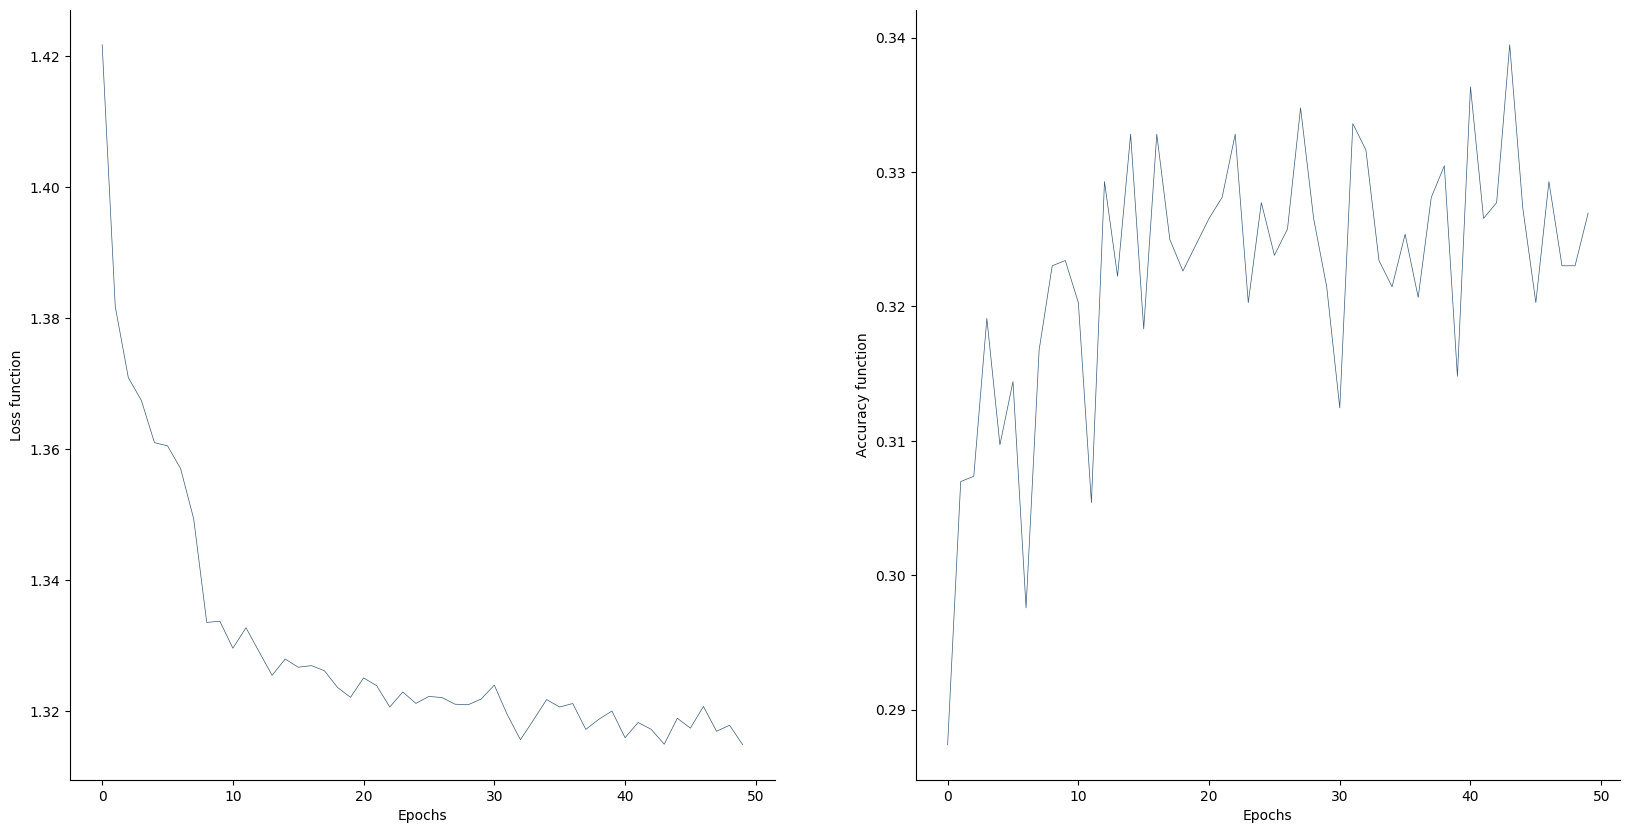

In [236]:
# %% View the training performance

fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(model_history.history['loss'])
plt.xlabel('Epochs'), plt.ylabel('Loss function')
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'), plt.ylabel('Accuracy function')

In [237]:
import graphviz
import pydot
# %% Neural network weights
model_best.layers[0].get_weights()
# model.get_config() #model configuration
# %% View the model
plot_model(model_best)
# plot_model(model, to_file='../figures/P9_fig/model.png', show_shapes=True)
# %% Use the model
# Latest version
Y_prob = model.predict(X_test5)
Y_pred = np.argmax(Y_prob, axis=1)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
23/23 [==============================] - 0s 2ms/step


InvalidIndexError: (0, slice(None, None, None))

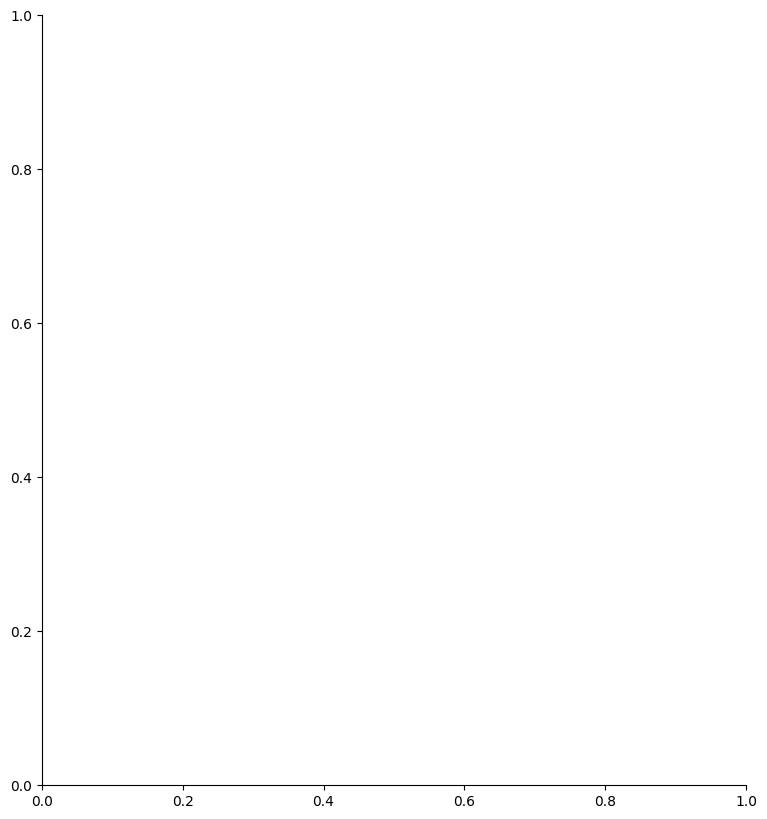

In [238]:
# %% View the neural network prediction
indx = 0
fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(np.reshape(X_test4[indx, :], (8, 8)), cmap=plt.cm.gray_r)
plt.subplot(122)
plt.bar(np.arange(10), Y_prob[indx, :])
plt.ylim([0, 1])
plt.title('Prediction: %d' % np.argmax(Y_prob[indx, :]))

In [239]:
score = model_best.evaluate(X_test4, Y_test_dum, verbose=1)
print(score)

23/23 [==============================] - 0s 2ms/step - loss: 1.3834 - accuracy: 0.3082
[1.3834412097930908, 0.30821916460990906]


In [240]:
# %% More metrics

Yhat_train = np.argmax(model.predict(X_train5), axis=1)
Yhat_test = np.argmax(model.predict(X_test5), axis=1)
accu_train = accuracy_score(y_train5, Yhat_train)
prec_train = precision_score(y_train5, Yhat_train, average='weighted',zero_division = 1)
reca_train = recall_score(y_train5, Yhat_train, average='weighted',zero_division = 1)
accu_test = accuracy_score(y_test5, Yhat_test)
prec_test = precision_score(y_test5, Yhat_test, average='weighted',zero_division = 0)
reca_test = recall_score(y_test5, Yhat_test, average='weighted',zero_division = 0)
print(' \t\t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f' % (accu_train,
                                                                                                            prec_train,
                                                                                                            reca_train,
                                                                                                            accu_test,
                                                                                                            prec_test,
                                                                                                            reca_test))

23/23 [==============================] - 0s 2ms/step
 		 Accu 	 Prec 	 Reca
 Train 	 0.053 	 0.772 	 0.053
  Test 	 0.082 	 0.029 	 0.082


In [241]:
results = {'Accuracy': [accuracy_martingala, accuracy_logistic, accuracy_naive, accuracy_forest],
           'Recall': [recall_martingala, recall_logistic, recall_naive, recall_forest],
           'Precision': [precision_martingala, precision_logistic, precision_naive, precision_forest],
           'F1': [f1_martingala, f1_logistic, f1_naive, f1_forest],
           'Balanced Accuracy': [balanced_martingala, balanced_logistic, balanced_naive, balanced_forest]
           }

table = pd.DataFrame(results, index=['Martingale', 'Logistic Regression', 'Naive Bayes', 'Random Forest'])
print(table)

                      Accuracy     Recall  Precision         F1  \
Martingale           27.850877  27.850877  27.850790  27.850829   
Logistic Regression  27.945205  27.945205  50.659737  23.562354   
Naive Bayes          31.232877  31.232877  33.803137  25.416627   
Random Forest        32.054795  32.054795  32.509789  31.269207   

                     Balanced Accuracy  
Martingale                   27.687613  
Logistic Regression          30.361733  
Naive Bayes                  27.739702  
Random Forest                31.698896  
